<div style="text-align: right">INFO 6105 Data Science Eng Methods and Tools, Spring 20 midterm, Section 7</div>
<div style="text-align: right">Dino Konstantopoulos, 26 February 2020</div>
<div style="text-align: right">100 points total</div>

# INFO 6105 Spring 20 Midterm

You have up to an hour. There is a *lot* of coding in this midterm. It is meant to simulate a real interview so you are *pressed for time*. Be mindful what you spend your time working on. Good luck!

>**NO CHEATING**: If you cheat by emailing or messaging during the midterm (and we can see you from behind), we will close your laptop and ask you to leave in front of everyone, you *will* get an F for the midterm, and have a nice little chat with director Kal. You are only allowed to browse, not to communicate in any shape or form, via email, messaging, or posting. Also, you are not allowed to post or share this midterm with anyone, not now, nor in the future. The other section is taking the midterm *after* spring break.

<div style="text-align: right">50 points</div>

# 1. Blackjack

[Blackjack](https://en.wikipedia.org/wiki/Blackjack) is the American version of a popular global banking game known as **Twenty-One**, whose relatives include *Pontoon* and *Vingt-et-Un*. It is a comparing card game between one or more players and a dealer, where each player in turn competes against the dealer. Players do not compete against each other, they compete against the dealer. It is played with one or more decks of 52 cards, and is the *most widely played casino banking game in the world*.

<br />
<center>
<img src = ipynb.images/bj.jpg width = 500 />
</center>

Players are each dealt two cards, face up or down depending on the casino and the table. In the U.S., the dealer is also dealt two cards, normally one up (exposed) and one down (hidden). In most other countries, the dealer only receives one card face up. The value of cards two through ten is their pip value (2 through 10). Face cards (Jack, Queen, and King) are all worth ten. Aces can be worth one *or* eleven. A hand's value is the sum of the card values. Players are allowed to draw additional cards to improve their hands. A hand with an ace valued as 11 is called "*soft*", meaning that the hand will not bust by taking an additional card. The value of the ace will become one to prevent the hand from exceeding 21.

<br />
<center>
<img src = ipynb.images/bj.webp width = 300 />
</center>

Once all the players have completed their hands, it is the dealer's turn. The dealer hand will not be completed if all players have either busted or received *blackjacks* (=21). The dealer then reveals the hidden card and must hit (draw another card) until the cards total up to 17 points. At 17 points or higher the dealer *must* stay (at most tables the dealer also hits on a "*soft*" 17, i.e. a hand containing an ace and one or more other cards totaling six). You are betting that you have a better hand than the dealer. The better hand is the hand where the sum of the card values is closer to 21 without exceeding 21. The detailed outcome of the hand follows:

- If the player is dealt an Ace and a ten-value card (called a "*blackjack*" or "*natural*"), and the dealer does not, the player wins and usually receives a bonus.
- If the player exceeds a sum of 21 ("*busts*"); the player loses, even if the dealer also exceeds 21.
- If the dealer exceeds 21 ("*busts*") and the player does not; the player wins.
- If the player attains a final sum higher than the dealer and does not bust; the player wins.
- If both dealer and player receive a blackjack or any other hands with the same sum, called a "*push*", *no one* wins.

Here's a game of blackjack in code:

In [32]:
from random import random
from random import choice

# available card colours
card_colours = ["diamonds", "heart", "spades", "clubs"]

# match the number or name of the card with its value inside the game
card_value = {
    'A': 11,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    'J': 10,
    'Q': 10,
    'K': 10
}


def calculate_score(card_list):
    """Calculate the score based on a list of cards
    Args:
        card_list: list of cards
    Returns:
        total score of the list of cards
    """
    total = 0
    for card in card_list:
        # Normally 'A' card is 11 points, but user can decide in case the sum of the score is above 21, to count
        # 'A' as 1 instead of 11, so if we find an ace and we are at 11 or more score, it will count as 1 point.
        if total >= 11 and card == 'A':
            total += 1
        else:
            total += card_value[card]
    return total


def play_turn(deck):
    """Run a turn of Blackjack for a player
    Args:
        deck: list of cards available
    Returns:
        total score of the turn
    """
    # We will store all the cards that come out in the following list
    table_cards = []
    user_input = 'y'
    
    # While user says 'y' and the player hasn't lost, cards will come out
    while user_input == 'y':
        
        # Calculate random card position
        position = int(random() * len(deck))
        
        # Give card
        print (deck[position])
        table_cards.append(deck[position][0])
        del deck[position]
        
        # Check if you lost, if you did the cycle will break
        if calculate_score(table_cards) >= 21:
            break
            
        # We ask the user through raw_input function if he wants another card
        user_input = raw_input('Do you want another card? (Y)')
        # Here we randomly pick 'y' or 'n':
        user_input = choice(['y', 'n'])
        
    print ("Your score is: %d" % calculate_score(table_cards))
    
    # Return the round total score
    return calculate_score(table_cards)


def game():
    # Define an empty deck
    deck = []
    
    # Populate the deck with all the 52 cards
    # For each colour...
    for colour in card_colours:
        # And for each card
        for card in card_value:
            # Append a card-colour couple in form of a tuple, the deck will look like this:
            # [('A', 'diamonds'), ('2', 'diamonds'), ('3', 'diamonds')...]
            deck.append((card, colour))

    # Create a list of players, in this case 2 players will play
    players = ['player 1', 'player 2']

    max_score = 0
    winner = None

    # run the game one time per player
    for player in players:
        print ("\n%s, your turn starts now!" % player)
        score = play_turn(deck)
        
        # We check who is winning the match, if the current player score is above previous highest,
        # he is the new winner
        if 21 >= score > max_score:
            max_score = score
            winner = player

    print ("Winner is %s" % winner)

Go ahead, play a game of blackjack:

In [2]:
game()


player 1, your turn starts now!
('9', 'clubs')
('7', 'heart')
Your score is: 16

player 2, your turn starts now!
('7', 'clubs')
('Q', 'spades')
('5', 'heart')
Your score is: 22
Winner is player 1


### Question 1
Now, *modify* the code above to follow the *american* rules of blackjack described above, so that player 1 is **you** and player 2 is the **dealer**. You have to modify the code *above*, not any other package.

### Question 2
*Then*, adopt this simple strategy:
- If your hand ≥ 18, 'stick' with a probability of 80%, else 'hit' with a probability of 80%. 

This isn’t an amazing policy but it is simple and you will still be able to win some games. Now, do a Monte Carlo simulation of this strategy and figure out its winning **Expectation** (by playing through thousands of games).

### Question 3
Now let's say that you want to know the value of holding a hand of 15 while the dealer is showing, let's say, a 10. This is an example of a **prediction** problem. Each time the agent carries out action A in state S for the first time in that game, it will calculate the reward of the game from that point onwards. By doing this, you can determine how valuable it is to be in that current state.

Suppose you run this Monte Carlo simulation many times and you come up with the followind strategy table:

<br />
<center>
<img src = ipynb.images/strategy.png width = 500 />
</center>

Now *implement* this strategy in code, run a Monte Carlo simulation, and compare the winning percentage with the previous strategy. `S` is **stick** (*no more cards, please*), `H` is **hit** (*please give me another card Mr. Dealer*), and assume `D` is **hit** as well. Which is a better strategy and by how much?

### ***Question 1***
Now, modify the code above to follow the american rules of blackjack described above, so that player 1 is you and player 2 is the dealer. You have to modify the code above, not any other package.

##### Code with player 1 and dealer

In [53]:
from random import random
from random import choice

# available card colours
card_colours = ["diamonds", "heart", "spades", "clubs"]

# match the number or name of the card with its value inside the game
card_value = {
    'A': 11,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    'J': 10,
    'Q': 10,
    'K': 10
}


def calculate_score(card_list):
    """Calculate the score based on a list of cards
    Args:
        card_list: list of cards
    Returns:
        total score of the list of cards
    """
    total = 0
    for card in card_list:
        # Normally 'A' card is 11 points, but user can decide in case the sum of the score is above 21, to count
        # 'A' as 1 instead of 11, so if we find an ace and we are at 11 or more score, it will count as 1 point.
        if total >= 11 and card == 'A':
            total += 1
        else:
            total += card_value[card]
    return total


def play_turn(player, deck):
    """Run a turn of Blackjack for a player
    Args:
        deck: list of cards available
    Returns:
        total score of the turn
    """
    # We will store all the cards that come out in the following list
    table_cards = []
    user_input = 'y'
    
    # While user says 'y' and the player hasn't lost, cards will come out
    while user_input == 'y':
        
        # Calculate random card position
        player = int(random() * len(deck))
        
        # Give card
        print (deck[player])
        table_cards.append(deck[player][0])
        del deck[player]
        
        # Check if you lost, if you did the cycle will break
        if calculate_score(table_cards) >= 21:
            break
            
        # We ask the user through raw_input function if he wants another card
        user_input = input('Do you want another card? (Y)')
        # Here we randomly pick 'y' or 'n':
        user_input = choice(['y', 'n'])
        
    #print ("Your score is: %d" % calculate_score(table_cards))
    print ("Player's score is: %d" % (calculate_score(table_cards)))
    print("\n")
    
    # Return the round total score
    return calculate_score(table_cards)


def dealer_turn(deck, dealer_cards):
    
    # Calulate Random card position for dealer's first card
    position = int(random() * len(deck))
    
    # Give the second card
    print ("Dealer's second card is ",deck[position])
    dealer_cards.append(deck[position][0])
    del deck[position]
    print("Dealer_cards",dealer_cards)
   
    # stop if the dealer has reached 17 or greater than it when he has drawn second card
    #(At 17 points or higher the dealer must stay)
    if(calculate_score(dealer_cards)>=17):
        print ("Ponits scored by the dealer: %d" % calculate_score(dealer_cards))
        return calculate_score(dealer_cards)
    
    # if it is less than 17 he has to hit
    else: 
        print ("Dealer's points after picking up two cards %d " % calculate_score(dealer_cards))
        print ("As dealer's score is less than 17 after picking up two cards. The dealer picks another card")
        
        #When the dealer's points are less than 17 he gets a chance to pick the next card
        while((calculate_score(dealer_cards)) <= 17):
            position = int(random() * len(deck))
            print ("Dealer's next card is ",deck[position])
            dealer_cards.append(deck[position][0])
            del deck[position]
        
        print("dealer_cards",dealer_cards)
        print ("Dealer score is: %d" % calculate_score(dealer_cards))
        print("\n")
        return calculate_score(dealer_cards)
    

def gameDealer():
    # Define an empty deck
    deck = []
    dealer_cards = []
    
    # Populate the deck with all the 52 cards
    # For each colour...
    for colour in card_colours:
        # And for each card
        for card in card_value:
            # Append a card-colour couple in form of a tuple, the deck will look like this:
            # [('A', 'diamonds'), ('2', 'diamonds'), ('3', 'diamonds')...]
            deck.append((card, colour))

    # Create a list of players, in this case a player and dealer will play
    players = ['Player 1','Dealer']

    max_score = 0
    winner = None
    
    # Calculate random card position for dealer's first card
    position = int(random() * len(deck))
        
    # Give card
    print ("Dealer's first card is ",deck[position])
    dealer_cards.append(deck[position][0])
    del deck[position]

    # run the game one time per player
    for player in players:
        if player == "Dealer":
            score = dealer_turn(deck, dealer_cards)
        else:
            print ("\n%s, your turn starts now!" % player)
            score = play_turn(player, deck)
        
        # We check who is winning the match, if the current player score is above previous highest,
        # he is the new winner
        if 21>=score and score==max_score:
            print ("No one wins since both have the same hand value")
            break
            
        if 21 >= score > max_score:
            max_score = score
            winner = player

    print ("Winner is %s" % winner)

In [54]:
gameDealer()

Dealer's first card is  ('6', 'diamonds')

Player 1, your turn starts now!
('A', 'clubs')
Do you want another card? (Y)y
('J', 'diamonds')
Player's score is: 21


Dealer's second card is  ('3', 'heart')
Dealer_cards ['6', '3']
Dealer's points after picking up two cards 9 
As dealer's score is less than 17 after picking up two cards. The dealer picks another card
Dealer's next card is  ('4', 'clubs')
Dealer's next card is  ('5', 'heart')
dealer_cards ['6', '3', '4', '5']
Dealer score is: 18


Winner is Player 1


### ***Question 2*** 
Then, adopt this simple strategy:

If your hand ≥ 18, 'stick' with a probability of 80%, else 'hit' with a probability of 80%.
This isn’t an amazing policy but it is simple and you will still be able to win some games. Now, do a Monte Carlo simulation of this strategy and figure out its winning Expectation (by playing through thousands of games).

Changed the function for dealer_turn to make sure that dealer must hit until he gets 17 points.

Changed the function for play_turn such that he takes two cards at start and then rest cards are taken depending on the condition 

***The following code is added***

###### probs = [0.2, 0.8] if calculate_score(table_cards) >= 18 else [0.8, 0.2]
######            user_input = np.random.choice(['y','n'], p=probs)

In [126]:
from random import random
from random import choice
import numpy as np

# available card colours
card_colours = ["diamonds", "heart", "spades", "clubs"]

# match the number or name of the card with its value inside the game
card_value = {
    'A': 11,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    'J': 10,
    'Q': 10,
    'K': 10
}


def calculate_score(card_list):
    """Calculate the score based on a list of cards
    Args:
        card_list: list of cards
    Returns:
        total score of the list of cards
    """
    total = 0
    for card in card_list:
        # Normally 'A' card is 11 points, but user can decide in case the sum of the score is above 21, to count
        # 'A' as 1 instead of 11, so if we find an ace and we are at 11 or more score, it will count as 1 point.
        if total >= 11 and card == 'A':
            total += 1
        else:
            total += card_value[card]
    return total


def play_turn(player, deck):
    """Run a turn of Blackjack for a player
    Args:
        deck: list of cards available
    Returns:
        total score of the turn
    """
    # store all the cards that come out in the following list
    table_cards = []
    user_input = 'y'
    temp=1
    
    # While user says 'y' and the player hasn't lost, cards will come out
    while user_input == 'y':
        temp=temp+1
        # Calculate random card position
        position = int(random() * len(deck))
       
        # Give card
        print (deck[position])
        table_cards.append(deck[position][0])
        del deck[position]
       
        # Check if you lost, if you did the cycle will break
        if calculate_score(table_cards) >= 21:
            break
           
        #The user should get two cards  
        if(temp==2): 
            user_input='y'
            
        else:
            #If your hand ≥ 18, 'stick' with a probability of 80%, else 'hit' with a probability of 80%.
            probs = [0.2, 0.8] if calculate_score(table_cards) >= 18 else [0.8, 0.2]
            #input given by the user
            u_input = np.random.choice(['y','n'], p=probs)
        
    print ("The player's score is: %d" % (calculate_score(table_cards)))
   
    # Return the round total score
    return calculate_score(table_cards)

def dealer_turn(deck, dealer_cards):
    # Calculate random card position for dealer's first card
    position = int(random() * len(deck))
    # Give card
    print ("Dealer's second card is ",deck[position])
    dealer_cards.append(deck[position][0])
   
    del deck[position]
    print("dealer_cards",dealer_cards)
   
    # stop if the dealer has reached 17 or greater than it when he has drawn second card
    if(calculate_score(dealer_cards)>=17):
        print ("Dealer score is: %d" % calculate_score(dealer_cards))
        return calculate_score(dealer_cards)
    
    else: # if it is less than 17 he has to hit
        print ("Dealer score after picking two cards is %d " % calculate_score(dealer_cards))
        position = int(random() * len(deck))
        print ("Dealer's third card is ",deck[position])
        dealer_cards.append(deck[position][0])
        del deck[position]
        print("dealer_cards",dealer_cards)
        print ("Dealer score is: %d" % calculate_score(dealer_cards))
        return calculate_score(dealer_cards)
       

def gameDealer():
    # Define an empty deck
    allwinner=[]
    for i in range(1000):
        deck = []
        dealer_cards = []

        # Populate the deck with all the 52 cards
        # For each colour...
        for colour in card_colours:
            # And for each card
            for card in card_value:
                # Append a card-colour couple in form of a tuple, the deck will look like this:
                # [('A', 'diamonds'), ('2', 'diamonds'), ('3', 'diamonds')...]
                deck.append((card, colour))

        # Create a list of players, in this case a player and dealer will play
        players = ['Player 1','Dealer']

        max_point = 0
        winner = None

        # Calculate random card position for dealer's first card
        position = int(random() * len(deck))

        # Give card
        print ("Dealer's first card is ",deck[position])
        dealer_cards.append(deck[position][0])
        del deck[position]

        # run the game one time per player
        for player in players:
            if player == "Dealer":
                point = dealer_turn(deck, dealer_cards)
            else:
                print ("\n%s, your turn starts now!" % player)
                point = play_turn(player, deck)

            # We check who is winning the match, if the current player score is above previous highest,
            # he is the new winner
            if 21 >= point > max_point:
                max_point = point
                winner = player
                
        allwinner.append(winner)
    return allwinner

In [127]:
allwinner=gameDealer()

Dealer's first card is  ('9', 'clubs')

Player 1, your turn starts now!
('7', 'spades')
('10', 'diamonds')
('8', 'diamonds')
The player's score is: 25
Dealer's second card is  ('9', 'heart')
dealer_cards ['9', '9']
Dealer score is: 18
Dealer's first card is  ('A', 'clubs')

Player 1, your turn starts now!
('J', 'clubs')
('Q', 'clubs')
('6', 'spades')
The player's score is: 26
Dealer's second card is  ('A', 'heart')
dealer_cards ['A', 'A']
Dealer score after picking two cards is 12 
Dealer's third card is  ('9', 'spades')
dealer_cards ['A', 'A', '9']
Dealer score is: 21
Dealer's first card is  ('5', 'diamonds')

Player 1, your turn starts now!
('3', 'heart')
('5', 'spades')
('4', 'diamonds')
('9', 'heart')
The player's score is: 21
Dealer's second card is  ('7', 'diamonds')
dealer_cards ['5', '7']
Dealer score after picking two cards is 12 
Dealer's third card is  ('8', 'spades')
dealer_cards ['5', '7', '8']
Dealer score is: 20
Dealer's first card is  ('A', 'heart')

Player 1, your turn

Player 1, your turn starts now!
('3', 'spades')
('3', 'diamonds')
('8', 'spades')
('7', 'spades')
The player's score is: 21
Dealer's second card is  ('9', 'clubs')
dealer_cards ['5', '9']
Dealer score after picking two cards is 14 
Dealer's third card is  ('10', 'heart')
dealer_cards ['5', '9', '10']
Dealer score is: 24
Dealer's first card is  ('10', 'clubs')

Player 1, your turn starts now!
('4', 'clubs')
('4', 'heart')
('K', 'diamonds')
('J', 'clubs')
The player's score is: 28
Dealer's second card is  ('Q', 'clubs')
dealer_cards ['10', 'Q']
Dealer score is: 20
Dealer's first card is  ('Q', 'spades')

Player 1, your turn starts now!
('K', 'diamonds')
('3', 'spades')
('9', 'spades')
The player's score is: 22
Dealer's second card is  ('8', 'clubs')
dealer_cards ['Q', '8']
Dealer score is: 18
Dealer's first card is  ('A', 'heart')

Player 1, your turn starts now!
('5', 'heart')
('9', 'spades')
('7', 'spades')
The player's score is: 21
Dealer's second card is  ('A', 'diamonds')
dealer_car

('Q', 'heart')
The player's score is: 26
Dealer's second card is  ('Q', 'clubs')
dealer_cards ['7', 'Q']
Dealer score is: 17
Dealer's first card is  ('2', 'spades')

Player 1, your turn starts now!
('4', 'clubs')
('3', 'clubs')
('A', 'diamonds')
('A', 'clubs')
('10', 'clubs')
The player's score is: 29
Dealer's second card is  ('6', 'spades')
dealer_cards ['2', '6']
Dealer score after picking two cards is 8 
Dealer's third card is  ('4', 'heart')
dealer_cards ['2', '6', '4']
Dealer score is: 12
Dealer's first card is  ('7', 'heart')

Player 1, your turn starts now!
('8', 'clubs')
('8', 'heart')
('10', 'spades')
The player's score is: 26
Dealer's second card is  ('A', 'heart')
dealer_cards ['7', 'A']
Dealer score is: 18
Dealer's first card is  ('K', 'diamonds')

Player 1, your turn starts now!
('7', 'spades')
('3', 'diamonds')
('K', 'spades')
('4', 'diamonds')
The player's score is: 24
Dealer's second card is  ('7', 'heart')
dealer_cards ['K', '7']
Dealer score is: 17
Dealer's first card

The player's score is: 24
Dealer's second card is  ('9', 'clubs')
dealer_cards ['10', '9']
Dealer score is: 19
Dealer's first card is  ('8', 'clubs')

Player 1, your turn starts now!
('Q', 'spades')
('4', 'diamonds')
('9', 'spades')
The player's score is: 23
Dealer's second card is  ('5', 'spades')
dealer_cards ['8', '5']
Dealer score after picking two cards is 13 
Dealer's third card is  ('6', 'heart')
dealer_cards ['8', '5', '6']
Dealer score is: 19
Dealer's first card is  ('3', 'clubs')

Player 1, your turn starts now!
('8', 'heart')
('6', 'clubs')
('Q', 'spades')
The player's score is: 24
Dealer's second card is  ('3', 'heart')
dealer_cards ['3', '3']
Dealer score after picking two cards is 6 
Dealer's third card is  ('2', 'heart')
dealer_cards ['3', '3', '2']
Dealer score is: 8
Dealer's first card is  ('8', 'clubs')

Player 1, your turn starts now!
('10', 'clubs')
('4', 'heart')
('4', 'clubs')
('4', 'diamonds')
The player's score is: 22
Dealer's second card is  ('2', 'diamonds')
d

Dealer's first card is  ('K', 'spades')

Player 1, your turn starts now!
('10', 'clubs')
('3', 'spades')
('7', 'diamonds')
('3', 'diamonds')
The player's score is: 23
Dealer's second card is  ('J', 'spades')
dealer_cards ['K', 'J']
Dealer score is: 20
Dealer's first card is  ('9', 'diamonds')

Player 1, your turn starts now!
('9', 'clubs')
('K', 'spades')
('J', 'heart')
The player's score is: 29
Dealer's second card is  ('2', 'diamonds')
dealer_cards ['9', '2']
Dealer score after picking two cards is 11 
Dealer's third card is  ('7', 'clubs')
dealer_cards ['9', '2', '7']
Dealer score is: 18
Dealer's first card is  ('3', 'spades')

Player 1, your turn starts now!
('6', 'diamonds')
('A', 'diamonds')
('5', 'heart')
The player's score is: 22
Dealer's second card is  ('5', 'spades')
dealer_cards ['3', '5']
Dealer score after picking two cards is 8 
Dealer's third card is  ('4', 'diamonds')
dealer_cards ['3', '5', '4']
Dealer score is: 12
Dealer's first card is  ('8', 'clubs')

Player 1, you

('9', 'clubs')
('A', 'clubs')
('7', 'clubs')
('9', 'spades')
The player's score is: 29
Dealer's second card is  ('10', 'spades')
dealer_cards ['8', '10']
Dealer score is: 18
Dealer's first card is  ('2', 'spades')

Player 1, your turn starts now!
('8', 'spades')
('Q', 'clubs')
('Q', 'diamonds')
The player's score is: 28
Dealer's second card is  ('10', 'heart')
dealer_cards ['2', '10']
Dealer score after picking two cards is 12 
Dealer's third card is  ('6', 'diamonds')
dealer_cards ['2', '10', '6']
Dealer score is: 18
Dealer's first card is  ('6', 'clubs')

Player 1, your turn starts now!
('A', 'clubs')
('5', 'spades')
('9', 'heart')
The player's score is: 25
Dealer's second card is  ('3', 'spades')
dealer_cards ['6', '3']
Dealer score after picking two cards is 9 
Dealer's third card is  ('2', 'heart')
dealer_cards ['6', '3', '2']
Dealer score is: 11
Dealer's first card is  ('K', 'heart')

Player 1, your turn starts now!
('9', 'heart')
('3', 'diamonds')
('6', 'clubs')
('10', 'spades')

Dealer's second card is  ('Q', 'diamonds')
dealer_cards ['3', 'Q']
Dealer score after picking two cards is 13 
Dealer's third card is  ('10', 'spades')
dealer_cards ['3', 'Q', '10']
Dealer score is: 23
Dealer's first card is  ('6', 'clubs')

Player 1, your turn starts now!
('10', 'spades')
('8', 'diamonds')
('10', 'diamonds')
The player's score is: 28
Dealer's second card is  ('A', 'heart')
dealer_cards ['6', 'A']
Dealer score is: 17
Dealer's first card is  ('10', 'diamonds')

Player 1, your turn starts now!
('5', 'clubs')
('6', 'spades')
('7', 'spades')
('J', 'spades')
The player's score is: 28
Dealer's second card is  ('Q', 'diamonds')
dealer_cards ['10', 'Q']
Dealer score is: 20
Dealer's first card is  ('6', 'clubs')

Player 1, your turn starts now!
('6', 'diamonds')
('Q', 'clubs')
('J', 'spades')
The player's score is: 26
Dealer's second card is  ('Q', 'heart')
dealer_cards ['6', 'Q']
Dealer score after picking two cards is 16 
Dealer's third card is  ('A', 'heart')
dealer_cards ['

Dealer's second card is  ('9', 'diamonds')
dealer_cards ['K', '9']
Dealer score is: 19
Dealer's first card is  ('10', 'diamonds')

Player 1, your turn starts now!
('3', 'diamonds')
('7', 'clubs')
('3', 'heart')
('7', 'diamonds')
('10', 'heart')
The player's score is: 30
Dealer's second card is  ('9', 'diamonds')
dealer_cards ['10', '9']
Dealer score is: 19
Dealer's first card is  ('3', 'clubs')

Player 1, your turn starts now!
('A', 'spades')
('2', 'diamonds')
('K', 'spades')
The player's score is: 23
Dealer's second card is  ('5', 'diamonds')
dealer_cards ['3', '5']
Dealer score after picking two cards is 8 
Dealer's third card is  ('6', 'diamonds')
dealer_cards ['3', '5', '6']
Dealer score is: 14
Dealer's first card is  ('2', 'heart')

Player 1, your turn starts now!
('K', 'clubs')
('6', 'heart')
('6', 'diamonds')
The player's score is: 22
Dealer's second card is  ('A', 'clubs')
dealer_cards ['2', 'A']
Dealer score after picking two cards is 13 
Dealer's third card is  ('3', 'diamond

Dealer's second card is  ('7', 'diamonds')
dealer_cards ['K', '7']
Dealer score is: 17
Dealer's first card is  ('6', 'clubs')

Player 1, your turn starts now!
('J', 'diamonds')
('10', 'heart')
('8', 'clubs')
The player's score is: 28
Dealer's second card is  ('A', 'heart')
dealer_cards ['6', 'A']
Dealer score is: 17
Dealer's first card is  ('10', 'heart')

Player 1, your turn starts now!
('6', 'diamonds')
('5', 'diamonds')
('K', 'spades')
The player's score is: 21
Dealer's second card is  ('9', 'spades')
dealer_cards ['10', '9']
Dealer score is: 19
Dealer's first card is  ('J', 'heart')

Player 1, your turn starts now!
('2', 'spades')
('4', 'spades')
('8', 'diamonds')
('2', 'diamonds')
('K', 'diamonds')
The player's score is: 26
Dealer's second card is  ('10', 'diamonds')
dealer_cards ['J', '10']
Dealer score is: 20
Dealer's first card is  ('5', 'diamonds')

Player 1, your turn starts now!
('10', 'clubs')
('4', 'diamonds')
('7', 'diamonds')
The player's score is: 21
Dealer's second car

Dealer score after picking two cards is 12 
Dealer's third card is  ('6', 'diamonds')
dealer_cards ['2', 'K', '6']
Dealer score is: 18
Dealer's first card is  ('3', 'clubs')

Player 1, your turn starts now!
('6', 'clubs')
('9', 'spades')
('Q', 'clubs')
The player's score is: 25
Dealer's second card is  ('2', 'heart')
dealer_cards ['3', '2']
Dealer score after picking two cards is 5 
Dealer's third card is  ('9', 'clubs')
dealer_cards ['3', '2', '9']
Dealer score is: 14
Dealer's first card is  ('9', 'spades')

Player 1, your turn starts now!
('6', 'diamonds')
('7', 'heart')
('9', 'clubs')
The player's score is: 22
Dealer's second card is  ('Q', 'diamonds')
dealer_cards ['9', 'Q']
Dealer score is: 19
Dealer's first card is  ('Q', 'spades')

Player 1, your turn starts now!
('10', 'spades')
('3', 'heart')
('K', 'spades')
The player's score is: 23
Dealer's second card is  ('5', 'spades')
dealer_cards ['Q', '5']
Dealer score after picking two cards is 15 
Dealer's third card is  ('9', 'spade

Player 1, your turn starts now!
('A', 'clubs')
('J', 'diamonds')
The player's score is: 21
Dealer's second card is  ('2', 'clubs')
dealer_cards ['3', '2']
Dealer score after picking two cards is 5 
Dealer's third card is  ('Q', 'clubs')
dealer_cards ['3', '2', 'Q']
Dealer score is: 15
Dealer's first card is  ('3', 'diamonds')

Player 1, your turn starts now!
('8', 'heart')
('5', 'clubs')
('3', 'spades')
('K', 'spades')
The player's score is: 26
Dealer's second card is  ('4', 'heart')
dealer_cards ['3', '4']
Dealer score after picking two cards is 7 
Dealer's third card is  ('9', 'clubs')
dealer_cards ['3', '4', '9']
Dealer score is: 16
Dealer's first card is  ('3', 'clubs')

Player 1, your turn starts now!
('A', 'diamonds')
('6', 'spades')
('Q', 'heart')
The player's score is: 27
Dealer's second card is  ('10', 'clubs')
dealer_cards ['3', '10']
Dealer score after picking two cards is 13 
Dealer's third card is  ('6', 'heart')
dealer_cards ['3', '10', '6']
Dealer score is: 19
Dealer's f

Dealer's second card is  ('5', 'heart')
dealer_cards ['10', '5']
Dealer score after picking two cards is 15 
Dealer's third card is  ('K', 'heart')
dealer_cards ['10', '5', 'K']
Dealer score is: 25
Dealer's first card is  ('J', 'heart')

Player 1, your turn starts now!
('7', 'heart')
('2', 'spades')
('4', 'heart')
('J', 'clubs')
The player's score is: 23
Dealer's second card is  ('10', 'heart')
dealer_cards ['J', '10']
Dealer score is: 20
Dealer's first card is  ('5', 'diamonds')

Player 1, your turn starts now!
('K', 'clubs')
('10', 'diamonds')
('5', 'heart')
The player's score is: 25
Dealer's second card is  ('2', 'heart')
dealer_cards ['5', '2']
Dealer score after picking two cards is 7 
Dealer's third card is  ('A', 'spades')
dealer_cards ['5', '2', 'A']
Dealer score is: 18
Dealer's first card is  ('8', 'heart')

Player 1, your turn starts now!
('J', 'clubs')
('3', 'spades')
('10', 'clubs')
The player's score is: 23
Dealer's second card is  ('9', 'spades')
dealer_cards ['8', '9']
D

Player 1, your turn starts now!
('10', 'diamonds')
('7', 'heart')
('6', 'heart')
The player's score is: 23
Dealer's second card is  ('A', 'diamonds')
dealer_cards ['Q', 'A']
Dealer score is: 21
Dealer's first card is  ('J', 'clubs')

Player 1, your turn starts now!
('10', 'diamonds')
('6', 'diamonds')
('K', 'spades')
The player's score is: 26
Dealer's second card is  ('8', 'heart')
dealer_cards ['J', '8']
Dealer score is: 18
Dealer's first card is  ('3', 'diamonds')

Player 1, your turn starts now!
('10', 'clubs')
('6', 'diamonds')
('3', 'spades')
('9', 'clubs')
The player's score is: 28
Dealer's second card is  ('J', 'clubs')
dealer_cards ['3', 'J']
Dealer score after picking two cards is 13 
Dealer's third card is  ('K', 'clubs')
dealer_cards ['3', 'J', 'K']
Dealer score is: 23
Dealer's first card is  ('K', 'diamonds')

Player 1, your turn starts now!
('J', 'clubs')
('9', 'spades')
('4', 'heart')
The player's score is: 23
Dealer's second card is  ('2', 'diamonds')
dealer_cards ['K', 

Dealer's first card is  ('7', 'spades')

Player 1, your turn starts now!
('2', 'clubs')
('9', 'spades')
('K', 'clubs')
The player's score is: 21
Dealer's second card is  ('8', 'diamonds')
dealer_cards ['7', '8']
Dealer score after picking two cards is 15 
Dealer's third card is  ('5', 'diamonds')
dealer_cards ['7', '8', '5']
Dealer score is: 20
Dealer's first card is  ('2', 'spades')

Player 1, your turn starts now!
('K', 'clubs')
('9', 'spades')
('6', 'clubs')
The player's score is: 25
Dealer's second card is  ('3', 'diamonds')
dealer_cards ['2', '3']
Dealer score after picking two cards is 5 
Dealer's third card is  ('K', 'diamonds')
dealer_cards ['2', '3', 'K']
Dealer score is: 15
Dealer's first card is  ('K', 'spades')

Player 1, your turn starts now!
('4', 'spades')
('8', 'heart')
('7', 'clubs')
('6', 'spades')
The player's score is: 25
Dealer's second card is  ('J', 'clubs')
dealer_cards ['K', 'J']
Dealer score is: 20
Dealer's first card is  ('K', 'spades')

Player 1, your turn s

Dealer score is: 16
Dealer's first card is  ('J', 'heart')

Player 1, your turn starts now!
('6', 'spades')
('Q', 'diamonds')
('4', 'spades')
('9', 'heart')
The player's score is: 29
Dealer's second card is  ('Q', 'spades')
dealer_cards ['J', 'Q']
Dealer score is: 20
Dealer's first card is  ('9', 'spades')

Player 1, your turn starts now!
('9', 'clubs')
('5', 'diamonds')
('5', 'clubs')
('5', 'spades')
The player's score is: 24
Dealer's second card is  ('4', 'heart')
dealer_cards ['9', '4']
Dealer score after picking two cards is 13 
Dealer's third card is  ('6', 'diamonds')
dealer_cards ['9', '4', '6']
Dealer score is: 19
Dealer's first card is  ('10', 'diamonds')

Player 1, your turn starts now!
('3', 'heart')
('7', 'spades')
('5', 'clubs')
('K', 'clubs')
The player's score is: 25
Dealer's second card is  ('7', 'diamonds')
dealer_cards ['10', '7']
Dealer score is: 17
Dealer's first card is  ('2', 'heart')

Player 1, your turn starts now!
('9', 'spades')
('A', 'diamonds')
('9', 'clubs'

Dealer's third card is  ('4', 'clubs')
dealer_cards ['8', '8', '4']
Dealer score is: 20
Dealer's first card is  ('3', 'clubs')

Player 1, your turn starts now!
('Q', 'heart')
('5', 'heart')
('3', 'spades')
('2', 'diamonds')
('A', 'spades')
The player's score is: 21
Dealer's second card is  ('10', 'heart')
dealer_cards ['3', '10']
Dealer score after picking two cards is 13 
Dealer's third card is  ('5', 'spades')
dealer_cards ['3', '10', '5']
Dealer score is: 18
Dealer's first card is  ('9', 'spades')

Player 1, your turn starts now!
('5', 'heart')
('8', 'clubs')
('Q', 'diamonds')
The player's score is: 23
Dealer's second card is  ('6', 'clubs')
dealer_cards ['9', '6']
Dealer score after picking two cards is 15 
Dealer's third card is  ('4', 'heart')
dealer_cards ['9', '6', '4']
Dealer score is: 19
Dealer's first card is  ('K', 'clubs')

Player 1, your turn starts now!
('A', 'heart')
('6', 'spades')
('7', 'spades')
The player's score is: 24
Dealer's second card is  ('6', 'heart')
dealer

Dealer score after picking two cards is 15 
Dealer's third card is  ('3', 'diamonds')
dealer_cards ['K', '5', '3']
Dealer score is: 18
Dealer's first card is  ('8', 'spades')

Player 1, your turn starts now!
('9', 'spades')
('4', 'heart')
('2', 'spades')
('Q', 'diamonds')
The player's score is: 25
Dealer's second card is  ('K', 'diamonds')
dealer_cards ['8', 'K']
Dealer score is: 18
Dealer's first card is  ('Q', 'clubs')

Player 1, your turn starts now!
('2', 'diamonds')
('6', 'heart')
('7', 'heart')
('3', 'spades')
('5', 'heart')
The player's score is: 23
Dealer's second card is  ('A', 'diamonds')
dealer_cards ['Q', 'A']
Dealer score is: 21
Dealer's first card is  ('Q', 'spades')

Player 1, your turn starts now!
('K', 'clubs')
('2', 'spades')
('6', 'diamonds')
('Q', 'clubs')
The player's score is: 28
Dealer's second card is  ('10', 'spades')
dealer_cards ['Q', '10']
Dealer score is: 20
Dealer's first card is  ('4', 'heart')

Player 1, your turn starts now!
('9', 'heart')
('4', 'clubs'

Dealer's first card is  ('5', 'diamonds')

Player 1, your turn starts now!
('Q', 'spades')
('3', 'diamonds')
('2', 'spades')
('6', 'spades')
The player's score is: 21
Dealer's second card is  ('10', 'clubs')
dealer_cards ['5', '10']
Dealer score after picking two cards is 15 
Dealer's third card is  ('10', 'diamonds')
dealer_cards ['5', '10', '10']
Dealer score is: 25
Dealer's first card is  ('3', 'heart')

Player 1, your turn starts now!
('9', 'diamonds')
('4', 'clubs')
('Q', 'spades')
The player's score is: 23
Dealer's second card is  ('2', 'diamonds')
dealer_cards ['3', '2']
Dealer score after picking two cards is 5 
Dealer's third card is  ('5', 'heart')
dealer_cards ['3', '2', '5']
Dealer score is: 10
Dealer's first card is  ('4', 'heart')

Player 1, your turn starts now!
('K', 'spades')
('10', 'clubs')
('8', 'diamonds')
The player's score is: 28
Dealer's second card is  ('9', 'spades')
dealer_cards ['4', '9']
Dealer score after picking two cards is 13 
Dealer's third card is  ('3

Dealer's second card is  ('8', 'heart')
dealer_cards ['A', '8']
Dealer score is: 19
Dealer's first card is  ('10', 'diamonds')

Player 1, your turn starts now!
('3', 'clubs')
('6', 'clubs')
('10', 'clubs')
('6', 'heart')
The player's score is: 25
Dealer's second card is  ('4', 'diamonds')
dealer_cards ['10', '4']
Dealer score after picking two cards is 14 
Dealer's third card is  ('K', 'heart')
dealer_cards ['10', '4', 'K']
Dealer score is: 24
Dealer's first card is  ('K', 'spades')

Player 1, your turn starts now!
('5', 'spades')
('A', 'clubs')
('3', 'clubs')
('4', 'diamonds')
The player's score is: 23
Dealer's second card is  ('9', 'heart')
dealer_cards ['K', '9']
Dealer score is: 19
Dealer's first card is  ('6', 'heart')

Player 1, your turn starts now!
('Q', 'spades')
('5', 'spades')
('A', 'diamonds')
('A', 'spades')
('6', 'diamonds')
The player's score is: 23
Dealer's second card is  ('3', 'spades')
dealer_cards ['6', '3']
Dealer score after picking two cards is 9 
Dealer's third 

Player 1, your turn starts now!
('6', 'heart')
('8', 'spades')
('4', 'clubs')
('9', 'heart')
The player's score is: 27
Dealer's second card is  ('4', 'spades')
dealer_cards ['5', '4']
Dealer score after picking two cards is 9 
Dealer's third card is  ('K', 'heart')
dealer_cards ['5', '4', 'K']
Dealer score is: 19
Dealer's first card is  ('K', 'spades')

Player 1, your turn starts now!
('2', 'clubs')
('A', 'clubs')
('A', 'spades')
('3', 'diamonds')
('9', 'heart')
The player's score is: 26
Dealer's second card is  ('8', 'heart')
dealer_cards ['K', '8']
Dealer score is: 18
Dealer's first card is  ('K', 'clubs')

Player 1, your turn starts now!
('5', 'clubs')
('8', 'diamonds')
('7', 'diamonds')
('J', 'clubs')
The player's score is: 30
Dealer's second card is  ('5', 'heart')
dealer_cards ['K', '5']
Dealer score after picking two cards is 15 
Dealer's third card is  ('8', 'spades')
dealer_cards ['K', '5', '8']
Dealer score is: 23
Dealer's first card is  ('Q', 'diamonds')

Player 1, your turn

dealer_cards ['2', '7', '8']
Dealer score is: 17
Dealer's first card is  ('Q', 'clubs')

Player 1, your turn starts now!
('8', 'heart')
('3', 'diamonds')
('J', 'clubs')
The player's score is: 21
Dealer's second card is  ('K', 'diamonds')
dealer_cards ['Q', 'K']
Dealer score is: 20
Dealer's first card is  ('7', 'clubs')

Player 1, your turn starts now!
('2', 'clubs')
('8', 'diamonds')
('A', 'spades')
The player's score is: 21
Dealer's second card is  ('4', 'heart')
dealer_cards ['7', '4']
Dealer score after picking two cards is 11 
Dealer's third card is  ('J', 'spades')
dealer_cards ['7', '4', 'J']
Dealer score is: 21
Dealer's first card is  ('A', 'heart')

Player 1, your turn starts now!
('5', 'heart')
('7', 'spades')
('9', 'clubs')
The player's score is: 21
Dealer's second card is  ('2', 'diamonds')
dealer_cards ['A', '2']
Dealer score after picking two cards is 13 
Dealer's third card is  ('8', 'spades')
dealer_cards ['A', '2', '8']
Dealer score is: 21
Dealer's first card is  ('J', 

Player 1, your turn starts now!
('3', 'clubs')
('Q', 'spades')
('Q', 'clubs')
The player's score is: 23
Dealer's second card is  ('10', 'heart')
dealer_cards ['5', '10']
Dealer score after picking two cards is 15 
Dealer's third card is  ('8', 'diamonds')
dealer_cards ['5', '10', '8']
Dealer score is: 23
Dealer's first card is  ('5', 'spades')

Player 1, your turn starts now!
('8', 'spades')
('A', 'spades')
('J', 'spades')
The player's score is: 29
Dealer's second card is  ('7', 'heart')
dealer_cards ['5', '7']
Dealer score after picking two cards is 12 
Dealer's third card is  ('5', 'heart')
dealer_cards ['5', '7', '5']
Dealer score is: 17
Dealer's first card is  ('J', 'spades')

Player 1, your turn starts now!
('3', 'heart')
('Q', 'diamonds')
('4', 'spades')
('9', 'clubs')
The player's score is: 26
Dealer's second card is  ('6', 'clubs')
dealer_cards ['J', '6']
Dealer score after picking two cards is 16 
Dealer's third card is  ('K', 'diamonds')
dealer_cards ['J', '6', 'K']
Dealer sc

Dealer score after picking two cards is 13 
Dealer's third card is  ('Q', 'diamonds')
dealer_cards ['6', '7', 'Q']
Dealer score is: 23
Dealer's first card is  ('10', 'spades')

Player 1, your turn starts now!
('6', 'clubs')
('10', 'clubs')
('4', 'diamonds')
('10', 'heart')
The player's score is: 30
Dealer's second card is  ('10', 'diamonds')
dealer_cards ['10', '10']
Dealer score is: 20
Dealer's first card is  ('10', 'spades')

Player 1, your turn starts now!
('2', 'heart')
('10', 'diamonds')
('4', 'diamonds')
('A', 'clubs')
('J', 'diamonds')
The player's score is: 27
Dealer's second card is  ('3', 'spades')
dealer_cards ['10', '3']
Dealer score after picking two cards is 13 
Dealer's third card is  ('9', 'spades')
dealer_cards ['10', '3', '9']
Dealer score is: 22
Dealer's first card is  ('4', 'spades')

Player 1, your turn starts now!
('2', 'diamonds')
('9', 'heart')
('4', 'heart')
('3', 'diamonds')
('2', 'spades')
('10', 'clubs')
The player's score is: 30
Dealer's second card is  ('K

dealer_cards ['6', 'K', 'K']
Dealer score is: 26
Dealer's first card is  ('A', 'clubs')

Player 1, your turn starts now!
('10', 'clubs')
('8', 'diamonds')
('Q', 'diamonds')
The player's score is: 28
Dealer's second card is  ('7', 'diamonds')
dealer_cards ['A', '7']
Dealer score is: 18
Dealer's first card is  ('2', 'heart')

Player 1, your turn starts now!
('9', 'diamonds')
('Q', 'spades')
('4', 'spades')
The player's score is: 23
Dealer's second card is  ('7', 'clubs')
dealer_cards ['2', '7']
Dealer score after picking two cards is 9 
Dealer's third card is  ('K', 'clubs')
dealer_cards ['2', '7', 'K']
Dealer score is: 19
Dealer's first card is  ('6', 'spades')

Player 1, your turn starts now!
('3', 'spades')
('4', 'clubs')
('4', 'heart')
('Q', 'spades')
The player's score is: 21
Dealer's second card is  ('A', 'heart')
dealer_cards ['6', 'A']
Dealer score is: 17
Dealer's first card is  ('10', 'spades')

Player 1, your turn starts now!
('3', 'spades')
('7', 'spades')
('J', 'clubs')
('9',

The player's score is: 25
Dealer's second card is  ('5', 'clubs')
dealer_cards ['3', '5']
Dealer score after picking two cards is 8 
Dealer's third card is  ('5', 'diamonds')
dealer_cards ['3', '5', '5']
Dealer score is: 13
Dealer's first card is  ('8', 'heart')

Player 1, your turn starts now!
('K', 'diamonds')
('K', 'clubs')
('10', 'diamonds')
The player's score is: 30
Dealer's second card is  ('8', 'spades')
dealer_cards ['8', '8']
Dealer score after picking two cards is 16 
Dealer's third card is  ('4', 'spades')
dealer_cards ['8', '8', '4']
Dealer score is: 20
Dealer's first card is  ('5', 'heart')

Player 1, your turn starts now!
('8', 'clubs')
('4', 'clubs')
('Q', 'diamonds')
The player's score is: 22
Dealer's second card is  ('9', 'spades')
dealer_cards ['5', '9']
Dealer score after picking two cards is 14 
Dealer's third card is  ('5', 'diamonds')
dealer_cards ['5', '9', '5']
Dealer score is: 19
Dealer's first card is  ('5', 'diamonds')

Player 1, your turn starts now!
('9', '

dealer_cards ['7', '8', '10']
Dealer score is: 25
Dealer's first card is  ('7', 'clubs')

Player 1, your turn starts now!
('6', 'heart')
('A', 'clubs')
('Q', 'spades')
The player's score is: 27
Dealer's second card is  ('5', 'diamonds')
dealer_cards ['7', '5']
Dealer score after picking two cards is 12 
Dealer's third card is  ('7', 'spades')
dealer_cards ['7', '5', '7']
Dealer score is: 19
Dealer's first card is  ('2', 'heart')

Player 1, your turn starts now!
('J', 'heart')
('8', 'diamonds')
('9', 'diamonds')
The player's score is: 27
Dealer's second card is  ('6', 'diamonds')
dealer_cards ['2', '6']
Dealer score after picking two cards is 8 
Dealer's third card is  ('J', 'clubs')
dealer_cards ['2', '6', 'J']
Dealer score is: 18
Dealer's first card is  ('3', 'spades')

Player 1, your turn starts now!
('A', 'spades')
('8', 'heart')
('2', 'heart')
The player's score is: 21
Dealer's second card is  ('6', 'diamonds')
dealer_cards ['3', '6']
Dealer score after picking two cards is 9 
Deal

dealer_cards ['K', '9']
Dealer score is: 19
Dealer's first card is  ('8', 'spades')

Player 1, your turn starts now!
('J', 'heart')
('K', 'clubs')
('6', 'heart')
The player's score is: 26
Dealer's second card is  ('3', 'heart')
dealer_cards ['8', '3']
Dealer score after picking two cards is 11 
Dealer's third card is  ('A', 'heart')
dealer_cards ['8', '3', 'A']
Dealer score is: 12
Dealer's first card is  ('2', 'diamonds')

Player 1, your turn starts now!
('6', 'diamonds')
('J', 'spades')
('4', 'clubs')
('9', 'heart')
The player's score is: 29
Dealer's second card is  ('A', 'diamonds')
dealer_cards ['2', 'A']
Dealer score after picking two cards is 13 
Dealer's third card is  ('6', 'clubs')
dealer_cards ['2', 'A', '6']
Dealer score is: 19
Dealer's first card is  ('7', 'clubs')

Player 1, your turn starts now!
('3', 'clubs')
('A', 'spades')
('9', 'clubs')
The player's score is: 23
Dealer's second card is  ('10', 'clubs')
dealer_cards ['7', '10']
Dealer score is: 17
Dealer's first card is

Player 1, your turn starts now!
('A', 'clubs')
('J', 'heart')
The player's score is: 21
Dealer's second card is  ('Q', 'spades')
dealer_cards ['6', 'Q']
Dealer score after picking two cards is 16 
Dealer's third card is  ('4', 'heart')
dealer_cards ['6', 'Q', '4']
Dealer score is: 20
Dealer's first card is  ('A', 'clubs')

Player 1, your turn starts now!
('6', 'clubs')
('J', 'diamonds')
('Q', 'clubs')
The player's score is: 26
Dealer's second card is  ('A', 'heart')
dealer_cards ['A', 'A']
Dealer score after picking two cards is 12 
Dealer's third card is  ('5', 'spades')
dealer_cards ['A', 'A', '5']
Dealer score is: 17
Dealer's first card is  ('5', 'spades')

Player 1, your turn starts now!
('2', 'clubs')
('5', 'diamonds')
('J', 'diamonds')
('2', 'diamonds')
('Q', 'heart')
The player's score is: 29
Dealer's second card is  ('4', 'clubs')
dealer_cards ['5', '4']
Dealer score after picking two cards is 9 
Dealer's third card is  ('J', 'heart')
dealer_cards ['5', '4', 'J']
Dealer score i

Dealer's third card is  ('6', 'diamonds')
dealer_cards ['3', 'J', '6']
Dealer score is: 19
Dealer's first card is  ('6', 'clubs')

Player 1, your turn starts now!
('A', 'spades')
('10', 'heart')
The player's score is: 21
Dealer's second card is  ('6', 'diamonds')
dealer_cards ['6', '6']
Dealer score after picking two cards is 12 
Dealer's third card is  ('10', 'spades')
dealer_cards ['6', '6', '10']
Dealer score is: 22
Dealer's first card is  ('6', 'clubs')

Player 1, your turn starts now!
('5', 'spades')
('A', 'spades')
('J', 'diamonds')
The player's score is: 26
Dealer's second card is  ('5', 'clubs')
dealer_cards ['6', '5']
Dealer score after picking two cards is 11 
Dealer's third card is  ('4', 'heart')
dealer_cards ['6', '5', '4']
Dealer score is: 15
Dealer's first card is  ('5', 'spades')

Player 1, your turn starts now!
('4', 'clubs')
('J', 'clubs')
('7', 'clubs')
The player's score is: 21
Dealer's second card is  ('A', 'diamonds')
dealer_cards ['5', 'A']
Dealer score after pic

Dealer's third card is  ('5', 'heart')
dealer_cards ['2', '5', '5']
Dealer score is: 12
Dealer's first card is  ('3', 'heart')

Player 1, your turn starts now!
('J', 'heart')
('7', 'diamonds')
('8', 'heart')
The player's score is: 25
Dealer's second card is  ('J', 'spades')
dealer_cards ['3', 'J']
Dealer score after picking two cards is 13 
Dealer's third card is  ('6', 'diamonds')
dealer_cards ['3', 'J', '6']
Dealer score is: 19
Dealer's first card is  ('10', 'heart')

Player 1, your turn starts now!
('2', 'heart')
('7', 'heart')
('A', 'spades')
('4', 'heart')
The player's score is: 24
Dealer's second card is  ('Q', 'heart')
dealer_cards ['10', 'Q']
Dealer score is: 20
Dealer's first card is  ('2', 'spades')

Player 1, your turn starts now!
('5', 'spades')
('Q', 'diamonds')
('6', 'heart')
The player's score is: 21
Dealer's second card is  ('3', 'heart')
dealer_cards ['2', '3']
Dealer score after picking two cards is 5 
Dealer's third card is  ('10', 'clubs')
dealer_cards ['2', '3', '1

Dealer's second card is  ('10', 'diamonds')
dealer_cards ['3', '10']
Dealer score after picking two cards is 13 
Dealer's third card is  ('Q', 'heart')
dealer_cards ['3', '10', 'Q']
Dealer score is: 23
Dealer's first card is  ('7', 'heart')

Player 1, your turn starts now!
('3', 'clubs')
('10', 'heart')
('5', 'diamonds')
('6', 'heart')
The player's score is: 24
Dealer's second card is  ('J', 'spades')
dealer_cards ['7', 'J']
Dealer score is: 17
Dealer's first card is  ('10', 'clubs')

Player 1, your turn starts now!
('K', 'diamonds')
('7', 'spades')
('9', 'clubs')
The player's score is: 26
Dealer's second card is  ('3', 'spades')
dealer_cards ['10', '3']
Dealer score after picking two cards is 13 
Dealer's third card is  ('5', 'heart')
dealer_cards ['10', '3', '5']
Dealer score is: 18
Dealer's first card is  ('10', 'clubs')

Player 1, your turn starts now!
('A', 'spades')
('4', 'spades')
('10', 'spades')
The player's score is: 25
Dealer's second card is  ('2', 'diamonds')
dealer_cards 

('4', 'heart')
('8', 'heart')
('9', 'clubs')
The player's score is: 21
Dealer's second card is  ('6', 'diamonds')
dealer_cards ['8', '6']
Dealer score after picking two cards is 14 
Dealer's third card is  ('J', 'heart')
dealer_cards ['8', '6', 'J']
Dealer score is: 24
Dealer's first card is  ('7', 'spades')

Player 1, your turn starts now!
('8', 'clubs')
('7', 'clubs')
('5', 'heart')
('5', 'diamonds')
The player's score is: 25
Dealer's second card is  ('2', 'spades')
dealer_cards ['7', '2']
Dealer score after picking two cards is 9 
Dealer's third card is  ('6', 'spades')
dealer_cards ['7', '2', '6']
Dealer score is: 15
Dealer's first card is  ('6', 'clubs')

Player 1, your turn starts now!
('J', 'spades')
('8', 'diamonds')
('4', 'diamonds')
The player's score is: 22
Dealer's second card is  ('A', 'diamonds')
dealer_cards ['6', 'A']
Dealer score is: 17
Dealer's first card is  ('9', 'heart')

Player 1, your turn starts now!
('J', 'diamonds')
('K', 'heart')
('8', 'heart')
The player's s

('3', 'spades')
('K', 'clubs')
('7', 'clubs')
The player's score is: 22
Dealer's second card is  ('Q', 'spades')
dealer_cards ['6', 'Q']
Dealer score after picking two cards is 16 
Dealer's third card is  ('9', 'clubs')
dealer_cards ['6', 'Q', '9']
Dealer score is: 25
Dealer's first card is  ('10', 'heart')

Player 1, your turn starts now!
('8', 'heart')
('3', 'clubs')
('9', 'diamonds')
('7', 'diamonds')
The player's score is: 27
Dealer's second card is  ('7', 'heart')
dealer_cards ['10', '7']
Dealer score is: 17
Dealer's first card is  ('Q', 'clubs')

Player 1, your turn starts now!
('5', 'clubs')
('5', 'spades')
('A', 'heart')
The player's score is: 21
Dealer's second card is  ('7', 'spades')
dealer_cards ['Q', '7']
Dealer score is: 17
Dealer's first card is  ('4', 'heart')

Player 1, your turn starts now!
('6', 'heart')
('Q', 'clubs')
('3', 'heart')
('5', 'spades')
The player's score is: 24
Dealer's second card is  ('9', 'heart')
dealer_cards ['4', '9']
Dealer score after picking tw

Dealer's second card is  ('5', 'heart')
dealer_cards ['6', '5']
Dealer score after picking two cards is 11 
Dealer's third card is  ('10', 'clubs')
dealer_cards ['6', '5', '10']
Dealer score is: 21
Dealer's first card is  ('2', 'clubs')

Player 1, your turn starts now!
('6', 'spades')
('10', 'heart')
('10', 'diamonds')
The player's score is: 26
Dealer's second card is  ('K', 'diamonds')
dealer_cards ['2', 'K']
Dealer score after picking two cards is 12 
Dealer's third card is  ('9', 'spades')
dealer_cards ['2', 'K', '9']
Dealer score is: 21
Dealer's first card is  ('4', 'diamonds')

Player 1, your turn starts now!
('Q', 'diamonds')
('3', 'clubs')
('J', 'heart')
The player's score is: 23
Dealer's second card is  ('5', 'diamonds')
dealer_cards ['4', '5']
Dealer score after picking two cards is 9 
Dealer's third card is  ('4', 'spades')
dealer_cards ['4', '5', '4']
Dealer score is: 13
Dealer's first card is  ('6', 'spades')

Player 1, your turn starts now!
('9', 'heart')
('J', 'clubs')
('

('4', 'spades')
('J', 'heart')
('Q', 'spades')
The player's score is: 26
Dealer's second card is  ('7', 'spades')
dealer_cards ['4', '7']
Dealer score after picking two cards is 11 
Dealer's third card is  ('2', 'heart')
dealer_cards ['4', '7', '2']
Dealer score is: 13
Dealer's first card is  ('7', 'clubs')

Player 1, your turn starts now!
('3', 'clubs')
('8', 'heart')
('K', 'diamonds')
The player's score is: 21
Dealer's second card is  ('2', 'clubs')
dealer_cards ['7', '2']
Dealer score after picking two cards is 9 
Dealer's third card is  ('J', 'heart')
dealer_cards ['7', '2', 'J']
Dealer score is: 19
Dealer's first card is  ('A', 'heart')

Player 1, your turn starts now!
('7', 'clubs')
('3', 'diamonds')
('3', 'heart')
('Q', 'heart')
The player's score is: 23
Dealer's second card is  ('6', 'clubs')
dealer_cards ['A', '6']
Dealer score is: 17
Dealer's first card is  ('A', 'spades')

Player 1, your turn starts now!
('8', 'spades')
('2', 'heart')
('A', 'heart')
The player's score is: 21

('9', 'diamonds')
The player's score is: 29
Dealer's second card is  ('Q', 'spades')
dealer_cards ['5', 'Q']
Dealer score after picking two cards is 15 
Dealer's third card is  ('8', 'heart')
dealer_cards ['5', 'Q', '8']
Dealer score is: 23
Dealer's first card is  ('4', 'diamonds')

Player 1, your turn starts now!
('9', 'heart')
('Q', 'diamonds')
('9', 'spades')
The player's score is: 28
Dealer's second card is  ('3', 'spades')
dealer_cards ['4', '3']
Dealer score after picking two cards is 7 
Dealer's third card is  ('2', 'spades')
dealer_cards ['4', '3', '2']
Dealer score is: 9
Dealer's first card is  ('Q', 'diamonds')

Player 1, your turn starts now!
('2', 'diamonds')
('5', 'clubs')
('7', 'clubs')
('2', 'spades')
('J', 'spades')
The player's score is: 26
Dealer's second card is  ('10', 'spades')
dealer_cards ['Q', '10']
Dealer score is: 20
Dealer's first card is  ('J', 'heart')

Player 1, your turn starts now!
('3', 'clubs')
('A', 'spades')
('5', 'diamonds')
('8', 'spades')
The play

('3', 'clubs')
('K', 'clubs')
('Q', 'clubs')
The player's score is: 27
Dealer's second card is  ('10', 'heart')
dealer_cards ['8', '10']
Dealer score is: 18
Dealer's first card is  ('A', 'diamonds')

Player 1, your turn starts now!
('10', 'spades')
('K', 'heart')
('6', 'clubs')
The player's score is: 26
Dealer's second card is  ('K', 'spades')
dealer_cards ['A', 'K']
Dealer score is: 21
Dealer's first card is  ('5', 'clubs')

Player 1, your turn starts now!
('8', 'heart')
('3', 'heart')
('2', 'clubs')
('6', 'heart')
('3', 'clubs')
The player's score is: 22
Dealer's second card is  ('2', 'diamonds')
dealer_cards ['5', '2']
Dealer score after picking two cards is 7 
Dealer's third card is  ('2', 'spades')
dealer_cards ['5', '2', '2']
Dealer score is: 9
Dealer's first card is  ('4', 'diamonds')

Player 1, your turn starts now!
('8', 'spades')
('10', 'spades')
('K', 'spades')
The player's score is: 28
Dealer's second card is  ('A', 'spades')
dealer_cards ['4', 'A']
Dealer score after picki

Player 1, your turn starts now!
('5', 'heart')
('A', 'spades')
('2', 'heart')
('6', 'clubs')
The player's score is: 24
Dealer's second card is  ('K', 'diamonds')
dealer_cards ['5', 'K']
Dealer score after picking two cards is 15 
Dealer's third card is  ('9', 'clubs')
dealer_cards ['5', 'K', '9']
Dealer score is: 24
Dealer's first card is  ('6', 'diamonds')

Player 1, your turn starts now!
('K', 'heart')
('K', 'clubs')
('7', 'spades')
The player's score is: 27
Dealer's second card is  ('K', 'spades')
dealer_cards ['6', 'K']
Dealer score after picking two cards is 16 
Dealer's third card is  ('7', 'clubs')
dealer_cards ['6', 'K', '7']
Dealer score is: 23
Dealer's first card is  ('5', 'heart')

Player 1, your turn starts now!
('K', 'spades')
('10', 'diamonds')
('4', 'heart')
The player's score is: 24
Dealer's second card is  ('9', 'clubs')
dealer_cards ['5', '9']
Dealer score after picking two cards is 14 
Dealer's third card is  ('J', 'spades')
dealer_cards ['5', '9', 'J']
Dealer score 

Player 1, your turn starts now!
('K', 'clubs')
('A', 'heart')
The player's score is: 21
Dealer's second card is  ('A', 'spades')
dealer_cards ['5', 'A']
Dealer score after picking two cards is 16 
Dealer's third card is  ('4', 'clubs')
dealer_cards ['5', 'A', '4']
Dealer score is: 20
Dealer's first card is  ('J', 'diamonds')

Player 1, your turn starts now!
('6', 'clubs')
('A', 'heart')
('4', 'clubs')
The player's score is: 21
Dealer's second card is  ('10', 'heart')
dealer_cards ['J', '10']
Dealer score is: 20
Dealer's first card is  ('2', 'heart')

Player 1, your turn starts now!
('J', 'clubs')
('9', 'heart')
('7', 'diamonds')
The player's score is: 26
Dealer's second card is  ('6', 'clubs')
dealer_cards ['2', '6']
Dealer score after picking two cards is 8 
Dealer's third card is  ('7', 'heart')
dealer_cards ['2', '6', '7']
Dealer score is: 15
Dealer's first card is  ('9', 'heart')

Player 1, your turn starts now!
('J', 'heart')
('3', 'spades')
('4', 'diamonds')
('4', 'clubs')
The pl

allwinner contains data which represents if the dealer, Player1 wins or if both doesn't win which is represented by None

In [128]:
allwinner

['Dealer',
 'Dealer',
 'Player 1',
 'Dealer',
 'Dealer',
 'Player 1',
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 None,
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 None,
 'Dealer',
 'Player 1',
 'Dealer',
 'Player 1',
 'Dealer',
 'Dealer',
 'Dealer',
 None,
 'Player 1',
 'Player 1',
 'Dealer',
 'Dealer',
 'Player 1',
 'Dealer',
 'Dealer',
 'Player 1',
 'Dealer',
 'Player 1',
 'Dealer',
 'Player 1',
 'Dealer',
 'Dealer',
 'Dealer',
 None,
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 None,
 None,
 'Player 1',
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 None,
 'Dealer',
 'Player 1',
 'Dealer',
 'Dealer',
 None,
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 'Player 1',
 'Dealer',
 'Dealer',
 'Dealer',
 None,
 'Dealer',
 'Player 1',
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 'Player 1',
 'Dealer',
 'Dealer',
 'Player 1',
 'Dealer',
 'Dealer',
 'Dealer',
 'Dealer',
 No

##### Probability of Player1 and Dealer winning

In [129]:
# length of Player1win
Player1_win = len([ i for i in allwinner if i=="Player 1" ])
print(Player1_win)

#Length of dealer_win
Dealer_win = len([ i for i in allwinner if i=="Dealer" ])
print(Dealer_win)

#Length of draw matches
none_win = len([ i for i in allwinner if i==None])
print(none_win)

163
684
153


In [130]:
# Winning propablity of the Player1
Player1_win/(Player1_win+Dealer_win)

0.19244391971664698

In [131]:
# Winning propablity of the Dealer
Dealer_win/(Player1_win+Dealer_win)

0.807556080283353

#### Monte Carlo simulation of this strategy and figure out its winning Expectation (by playing through thousands of games).

In [132]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pylab as plt
import seaborn as sns

(0.1764088383926373, 0.2319327048646982)


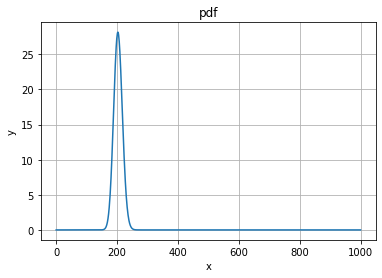

In [133]:
# our events is a list of 0s and 1s, at fixed probabilities
pick_card = np.random.choice(a= ["Player 1", "Dealer"],
                            p = [0.20, 0.80],
                            size=(Player1win+Dealerwin))

#Player 1 wins
successes = len([ x for x in allwinner if x=="Player 1" ]) 
#Dealer win
failures = len(pick_card) - successes

# prior parameters
alpha, beta = 1, 1

# calculate posterior distribution, using a beta distribution
posterior = stats.beta(alpha + successes, beta + failures)

# mean and 95% credible interval
mean = posterior.mean()
interval = posterior.interval(0.95)
print(interval)

#posterior distribution for plotting
plot = np.linspace(0, 1, num=1000)
pdf = posterior.pdf(plot)
plt.plot(pdf)
plt.xlabel('x')
plt.ylabel('y')
plt.title('pdf')
plt.grid(True)
plt.show()

### Question 3
Now let's say that you want to know the value of holding a hand of 15 while the dealer is showing, let's say, a 10. This is an example of a **prediction** problem. Each time the agent carries out action A in state S for the first time in that game, it will calculate the reward of the game from that point onwards. By doing this, you can determine how valuable it is to be in that current state.

Suppose you run this Monte Carlo simulation many times and you come up with the followind strategy table:

<br />
<center>
<img src = ipynb.images/strategy.png width = 500 />
</center>

Now *implement* this strategy in code, run a Monte Carlo simulation, and compare the winning percentage with the previous strategy. `S` is **stick** (*no more cards, please*), `H` is **hit** (*please give me another card Mr. Dealer*), and assume `D` is **hit** as well. Which is a better strategy and by how much?

In [134]:
#This fucntion tells if one must hit or stick according to the inputs given
def BlackJackStrategy(hard_total, dealer_card):
    if(dealer_card=='A'):
        dealer_card=1
    if(hard_total>=17 and (dealer_card>=1 and dealer_card<=10)):
        return 'stick'
    elif( (hard_total<=16 and hard_total>=13) and (dealer_card>=2 or dealer_card<=6) ):
        return 'stick'
    elif(hard_total==12 and (dealer_card==4 or dealer_card==5 or dealer_card==6)):
        return 'stick'
    elif( (hard_total<=16 and hard_total>=13)  and ( (dealer_card>=7 or dealer_card<=10) or (dealer_card==1))):
        return 'hit'
    elif(hard_total==12 and (dealer_card==2 or dealer_card==3 or dealer_card==7 or dealer_card==8 or dealer_card==9 or dealer_card==10 or dealer_card==1) ):
        return 'hit'
    elif( (hard_total<=11) and (dealer_card>=1 and dealer_card<=10) ):
        return 'hit'
    

Balck Jack Game according to the Strategy Table
when handtotal=12 and dealer_card= 3

In [137]:
BlackJackStrategy(12, 3)

'hit'

Checking the Balck Jack Game according to the Strategy Table
when handtotal=17 and dealer_card=3

In [136]:
BlackJackStrategy(17, 3)

'stick'

In [152]:


from random import random
from random import choice

# available card colours
card_colours = ["diamonds", "heart", "spades", "clubs"]

# match the number or name of the card with its value inside the game
card_value = {
    'A': 11,
    '2': 2,
    '3': 3,
    '4': 4,
    '5': 5,
    '6': 6,
    '7': 7,
    '8': 8,
    '9': 9,
    '10': 10,
    'J': 10,
    'Q': 10,
    'K': 10
}


def calculate_score(card_list):
    """Calculate the score based on a list of cards
    Args:
        card_list: list of cards
    Returns:
        total score of the list of cards
    """
    total = 0
    for card in card_list:
        # Normally 'A' card is 11 points, but user can decide in case the sum of the score is above 21, to count
        # 'A' as 1 instead of 11, so if we find an ace and we are at 11 or more score, it will count as 1 point.
        if total >= 11 and card == 'A':
            total += 1
        else:
            total += card_value[card]
    return total

def play_turn(player, deck,dealer_card):
    """Run a turn of Blackjack for a player
    Args:
        deck: list of cards available
    Returns:
        total score of the turn
    """
    # We will store all the cards that come out in the following list
    table_cards = []
    user_input = 'y'
    temp=1
    # While user says 'y' and the player hasn't lost, cards will come out
    while user_input == 'y':
        temp=temp+1
        # Calculate random card position
        position = int(random() * len(deck))
       
        # Give card
        print (deck[position])
        table_cards.append(deck[position][0])
        del deck[position]
       
        # Check if you lost, if you did the cycle will break
        if calculate_score(table_cards) >= 21:
            break
           
        
        
        '''Make sure that the user gets two cards '''   
        if(temp==2): 
            user_input='y'
          
        else:
            '''funciton to determine next move depeding upon strategy table'''  
            next_move=BlackJackStrategy(calculate_score(table_cards), dealer_card)
            if(next_move=='hit'):
                user_input='y'
            else:
                user_input='n'
                
                
    print (f"{player} score is: %d" % (calculate_score(table_cards)))
   
    # Return the round total score
    return calculate_score(table_cards)



def dealer_turn(deck, dealer_cards):
    # Calculate random card position for dealer's first card
    position = int(random() * len(deck))
    # Give card
    print ("Dealer's second card is ",deck[position])
    dealer_cards.append(deck[position][0])
   
    del deck[position]
    print("dealer_cards",dealer_cards)
   
    # stop if the dealer has reached 17 or greater than it when he has drawn second card
    #(At 17 points or higher the dealer must stay)
    if(calculate_score(dealer_cards)>=17):
        print ("Dealer score is: %d" % calculate_score(dealer_cards))
        return calculate_score(dealer_cards)
    else: # if it is less than 17 he has to hit
        print ("Dealer score after picking two cards is %d " % calculate_score(dealer_cards))
        print ("Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card")
        while((calculate_score(dealer_cards)) <= 17):
            position = int(random() * len(deck))
            print ("Dealer's next card is ",deck[position])
            dealer_cards.append(deck[position][0])
            del deck[position]
        print("dealer_cards",dealer_cards)
        print ("Dealer score is: %d" % calculate_score(dealer_cards))
        print("\n")
        return calculate_score(dealer_cards)
       
       
           
   
   

def gameDealer():
    # Define an empty deck
    allwinner=[]
    for i in range(1000):
        deck = []
        dealer_cards = []

        # Populate the deck with all the 52 cards
        # For each colour...
        for colour in card_colours:
            # And for each card
            for card in card_value:
                # Append a card-colour couple in form of a tuple, the deck will look like this:
                # [('A', 'diamonds'), ('2', 'diamonds'), ('3', 'diamonds')...]
                deck.append((card, colour))

        # Create a list of players, in this case 2 players will play
        players = ['Player 1','Dealer']

        max_score = 0
        winner = None

        # Calculate random card position for dealer's first card
        position = int(random() * len(deck))

        # Give card
        print ("Dealer's first card is ",deck[position])
        dealer_cards.append(deck[position][0])
        del deck[position]

        # run the game one time per player
        for player in players:
            if player == "Dealer":
                score = dealer_turn(deck, dealer_cards)
            else:
                print ("\n%s, your turn starts now!" % player)
                score = play_turn(player, deck,calculate_score(dealer_cards))

            # We check who is winning the match, if the current player score is above previous highest,
            # he is the new winner
            if 21 >= score > max_score:
                max_score = score
                winner = player

    #print ("Winner is %s" % winner)
        allwinner.append(winner)
    return allwinner

In [153]:
allwinner=gameDealer()

Dealer's first card is  ('Q', 'spades')

Player 1, your turn starts now!
('9', 'heart')
('9', 'spades')
Player 1 score is: 18
Dealer's second card is  ('6', 'spades')
dealer_cards ['Q', '6']
Dealer score after picking two cards is 16 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('7', 'diamonds')
dealer_cards ['Q', '6', '7']
Dealer score is: 23


Dealer's first card is  ('K', 'diamonds')

Player 1, your turn starts now!
('6', 'diamonds')
('5', 'diamonds')
('Q', 'heart')
Player 1 score is: 21
Dealer's second card is  ('J', 'heart')
dealer_cards ['K', 'J']
Dealer score is: 20
Dealer's first card is  ('7', 'spades')

Player 1, your turn starts now!
('10', 'spades')
('K', 'heart')
Player 1 score is: 20
Dealer's second card is  ('8', 'diamonds')
dealer_cards ['7', '8']
Dealer score after picking two cards is 15 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's 

Dealer score after picking two cards is 13 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('6', 'spades')
dealer_cards ['J', '3', '6']
Dealer score is: 19


Dealer's first card is  ('9', 'spades')

Player 1, your turn starts now!
('A', 'diamonds')
('K', 'spades')
Player 1 score is: 21
Dealer's second card is  ('J', 'diamonds')
dealer_cards ['9', 'J']
Dealer score is: 19
Dealer's first card is  ('10', 'heart')

Player 1, your turn starts now!
('8', 'diamonds')
('6', 'diamonds')
Player 1 score is: 14
Dealer's second card is  ('6', 'heart')
dealer_cards ['10', '6']
Dealer score after picking two cards is 16 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('5', 'heart')
dealer_cards ['10', '6', '5']
Dealer score is: 21


Dealer's first card is  ('J', 'heart')

Player 1, your turn starts now!
('Q', 'clubs')
('6', 'spades')
Player 1 score is: 16
D

Dealer's second card is  ('4', 'diamonds')
dealer_cards ['A', '4']
Dealer score after picking two cards is 15 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('7', 'heart')
dealer_cards ['A', '4', '7']
Dealer score is: 22


Dealer's first card is  ('6', 'diamonds')

Player 1, your turn starts now!
('2', 'clubs')
('K', 'heart')
Player 1 score is: 12
Dealer's second card is  ('4', 'clubs')
dealer_cards ['6', '4']
Dealer score after picking two cards is 10 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('9', 'clubs')
dealer_cards ['6', '4', '9']
Dealer score is: 19


Dealer's first card is  ('6', 'spades')

Player 1, your turn starts now!
('Q', 'clubs')
('5', 'clubs')
Player 1 score is: 15
Dealer's second card is  ('8', 'spades')
dealer_cards ['6', '8']
Dealer score after picking two cards is 14 
Since dealer's score after picking picking up 2 

Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('Q', 'spades')
dealer_cards ['A', 'A', 'Q']
Dealer score is: 22


Dealer's first card is  ('Q', 'spades')

Player 1, your turn starts now!
('3', 'heart')
('2', 'heart')
('J', 'spades')
Player 1 score is: 15
Dealer's second card is  ('Q', 'diamonds')
dealer_cards ['Q', 'Q']
Dealer score is: 20
Dealer's first card is  ('J', 'clubs')

Player 1, your turn starts now!
('3', 'diamonds')
('7', 'heart')
('2', 'diamonds')
('3', 'spades')
Player 1 score is: 15
Dealer's second card is  ('8', 'diamonds')
dealer_cards ['J', '8']
Dealer score is: 18
Dealer's first card is  ('3', 'heart')

Player 1, your turn starts now!
('3', 'clubs')
('A', 'heart')
Player 1 score is: 14
Dealer's second card is  ('8', 'spades')
dealer_cards ['3', '8']
Dealer score after picking two cards is 11 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer'

Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('8', 'clubs')
dealer_cards ['8', '4', '8']
Dealer score is: 20


Dealer's first card is  ('J', 'heart')

Player 1, your turn starts now!
('6', 'spades')
('10', 'clubs')
Player 1 score is: 16
Dealer's second card is  ('7', 'heart')
dealer_cards ['J', '7']
Dealer score is: 17
Dealer's first card is  ('10', 'heart')

Player 1, your turn starts now!
('6', 'spades')
('A', 'heart')
Player 1 score is: 17
Dealer's second card is  ('Q', 'diamonds')
dealer_cards ['10', 'Q']
Dealer score is: 20
Dealer's first card is  ('4', 'spades')

Player 1, your turn starts now!
('10', 'spades')
('K', 'heart')
Player 1 score is: 20
Dealer's second card is  ('2', 'spades')
dealer_cards ['4', '2']
Dealer score after picking two cards is 6 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('9', 'diamonds')
Dealer's next car

Dealer's next card is  ('4', 'spades')
Dealer's next card is  ('6', 'spades')
dealer_cards ['5', '3', '4', '6']
Dealer score is: 18


Dealer's first card is  ('5', 'diamonds')

Player 1, your turn starts now!
('5', 'spades')
('6', 'spades')
('5', 'heart')
Player 1 score is: 16
Dealer's second card is  ('4', 'spades')
dealer_cards ['5', '4']
Dealer score after picking two cards is 9 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('5', 'clubs')
Dealer's next card is  ('3', 'diamonds')
Dealer's next card is  ('9', 'clubs')
dealer_cards ['5', '4', '5', '3', '9']
Dealer score is: 26


Dealer's first card is  ('10', 'spades')

Player 1, your turn starts now!
('Q', 'heart')
('10', 'clubs')
Player 1 score is: 20
Dealer's second card is  ('5', 'clubs')
dealer_cards ['10', '5']
Dealer score after picking two cards is 15 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer

Dealer's first card is  ('J', 'clubs')

Player 1, your turn starts now!
('2', 'spades')
('8', 'heart')
('2', 'heart')
('2', 'diamonds')
Player 1 score is: 14
Dealer's second card is  ('3', 'clubs')
dealer_cards ['J', '3']
Dealer score after picking two cards is 13 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('7', 'spades')
dealer_cards ['J', '3', '7']
Dealer score is: 20


Dealer's first card is  ('10', 'clubs')

Player 1, your turn starts now!
('9', 'heart')
('2', 'heart')
('8', 'clubs')
Player 1 score is: 19
Dealer's second card is  ('Q', 'spades')
dealer_cards ['10', 'Q']
Dealer score is: 20
Dealer's first card is  ('7', 'diamonds')

Player 1, your turn starts now!
('2', 'diamonds')
('K', 'heart')
('3', 'clubs')
Player 1 score is: 15
Dealer's second card is  ('6', 'heart')
dealer_cards ['7', '6']
Dealer score after picking two cards is 13 
Since dealer's score after picking picking up 2 cards is less than 1

Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('K', 'diamonds')
Dealer's next card is  ('8', 'heart')
dealer_cards ['4', '2', 'K', '8']
Dealer score is: 24


Dealer's first card is  ('A', 'diamonds')

Player 1, your turn starts now!
('8', 'heart')
('9', 'clubs')
Player 1 score is: 17
Dealer's second card is  ('7', 'heart')
dealer_cards ['A', '7']
Dealer score is: 18
Dealer's first card is  ('8', 'spades')

Player 1, your turn starts now!
('5', 'clubs')
('2', 'clubs')
('4', 'clubs')
('9', 'clubs')
Player 1 score is: 20
Dealer's second card is  ('5', 'spades')
dealer_cards ['8', '5']
Dealer score after picking two cards is 13 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('6', 'heart')
dealer_cards ['8', '5', '6']
Dealer score is: 19


Dealer's first card is  ('8', 'diamonds')

Player 1, your turn starts now!
('Q', 'diamonds')
('2', 'heart')

Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('6', 'clubs')
dealer_cards ['7', '9', '6']
Dealer score is: 22


Dealer's first card is  ('A', 'heart')

Player 1, your turn starts now!
('5', 'diamonds')
('7', 'heart')
Player 1 score is: 12
Dealer's second card is  ('2', 'diamonds')
dealer_cards ['A', '2']
Dealer score after picking two cards is 13 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('J', 'spades')
dealer_cards ['A', '2', 'J']
Dealer score is: 23


Dealer's first card is  ('A', 'clubs')

Player 1, your turn starts now!
('6', 'diamonds')
('7', 'diamonds')
Player 1 score is: 13
Dealer's second card is  ('7', 'clubs')
dealer_cards ['A', '7']
Dealer score is: 18
Dealer's first card is  ('Q', 'diamonds')

Player 1, your turn starts now!
('10', 'heart')
('7', 'clubs')
Player 1 score is: 17
Dealer's second card is  ('9', 'spades')
dealer

Dealer's next card is  ('8', 'diamonds')
Dealer's next card is  ('10', 'spades')
dealer_cards ['3', '3', '8', '10']
Dealer score is: 24


Dealer's first card is  ('7', 'spades')

Player 1, your turn starts now!
('Q', 'spades')
('4', 'clubs')
Player 1 score is: 14
Dealer's second card is  ('9', 'diamonds')
dealer_cards ['7', '9']
Dealer score after picking two cards is 16 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('6', 'heart')
dealer_cards ['7', '9', '6']
Dealer score is: 22


Dealer's first card is  ('A', 'clubs')

Player 1, your turn starts now!
('Q', 'diamonds')
('9', 'heart')
Player 1 score is: 19
Dealer's second card is  ('J', 'heart')
dealer_cards ['A', 'J']
Dealer score is: 21
Dealer's first card is  ('4', 'diamonds')

Player 1, your turn starts now!
('7', 'spades')
('A', 'heart')
Player 1 score is: 18
Dealer's second card is  ('2', 'diamonds')
dealer_cards ['4', '2']
Dealer score after picking two ca

Dealer score is: 22


Dealer's first card is  ('5', 'clubs')

Player 1, your turn starts now!
('9', 'spades')
('6', 'spades')
Player 1 score is: 15
Dealer's second card is  ('7', 'spades')
dealer_cards ['5', '7']
Dealer score after picking two cards is 12 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('K', 'clubs')
dealer_cards ['5', '7', 'K']
Dealer score is: 22


Dealer's first card is  ('3', 'diamonds')

Player 1, your turn starts now!
('A', 'heart')
('J', 'clubs')
Player 1 score is: 21
Dealer's second card is  ('A', 'spades')
dealer_cards ['3', 'A']
Dealer score after picking two cards is 14 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('10', 'diamonds')
dealer_cards ['3', 'A', '10']
Dealer score is: 24


Dealer's first card is  ('J', 'diamonds')

Player 1, your turn starts now!
('J', 'clubs')
('K', 'clubs')
Player 1 score is: 20
Dea

Dealer's next card is  ('8', 'spades')
dealer_cards ['A', '4', '8']
Dealer score is: 23


Dealer's first card is  ('7', 'clubs')

Player 1, your turn starts now!
('K', 'spades')
('8', 'spades')
Player 1 score is: 18
Dealer's second card is  ('9', 'spades')
dealer_cards ['7', '9']
Dealer score after picking two cards is 16 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('2', 'spades')
dealer_cards ['7', '9', '2']
Dealer score is: 18


Dealer's first card is  ('6', 'spades')

Player 1, your turn starts now!
('J', 'diamonds')
('3', 'spades')
Player 1 score is: 13
Dealer's second card is  ('7', 'diamonds')
dealer_cards ['6', '7']
Dealer score after picking two cards is 13 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('10', 'clubs')
dealer_cards ['6', '7', '10']
Dealer score is: 23


Dealer's first card is  ('Q', 'diamonds')

Player 1, your tu

Dealer score after picking two cards is 14 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('6', 'clubs')
dealer_cards ['4', 'J', '6']
Dealer score is: 20


Dealer's first card is  ('6', 'heart')

Player 1, your turn starts now!
('Q', 'heart')
('A', 'spades')
Player 1 score is: 21
Dealer's second card is  ('3', 'heart')
dealer_cards ['6', '3']
Dealer score after picking two cards is 9 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('4', 'spades')
Dealer's next card is  ('6', 'spades')
dealer_cards ['6', '3', '4', '6']
Dealer score is: 19


Dealer's first card is  ('K', 'clubs')

Player 1, your turn starts now!
('8', 'heart')
('J', 'clubs')
Player 1 score is: 18
Dealer's second card is  ('5', 'heart')
dealer_cards ['K', '5']
Dealer score after picking two cards is 15 
Since dealer's score after picking picking up 2 cards is less than 17. Deal

Player 1, your turn starts now!
('J', 'clubs')
('2', 'spades')
('6', 'diamonds')
Player 1 score is: 18
Dealer's second card is  ('6', 'clubs')
dealer_cards ['10', '6']
Dealer score after picking two cards is 16 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('A', 'heart')
Dealer's next card is  ('4', 'diamonds')
dealer_cards ['10', '6', 'A', '4']
Dealer score is: 21


Dealer's first card is  ('A', 'spades')

Player 1, your turn starts now!
('9', 'heart')
('7', 'clubs')
Player 1 score is: 16
Dealer's second card is  ('3', 'clubs')
dealer_cards ['A', '3']
Dealer score after picking two cards is 14 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('2', 'heart')
Dealer's next card is  ('8', 'diamonds')
dealer_cards ['A', '3', '2', '8']
Dealer score is: 24


Dealer's first card is  ('K', 'spades')

Player 1, your turn starts now!
('3', 'heart')
('

Dealer's next card is  ('10', 'spades')
dealer_cards ['6', '6', '10']
Dealer score is: 22


Dealer's first card is  ('10', 'heart')

Player 1, your turn starts now!
('7', 'diamonds')
('5', 'clubs')
('7', 'heart')
Player 1 score is: 19
Dealer's second card is  ('10', 'clubs')
dealer_cards ['10', '10']
Dealer score is: 20
Dealer's first card is  ('3', 'heart')

Player 1, your turn starts now!
('J', 'heart')
('K', 'clubs')
Player 1 score is: 20
Dealer's second card is  ('J', 'spades')
dealer_cards ['3', 'J']
Dealer score after picking two cards is 13 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('3', 'diamonds')
Dealer's next card is  ('7', 'heart')
dealer_cards ['3', 'J', '3', '7']
Dealer score is: 23


Dealer's first card is  ('2', 'spades')

Player 1, your turn starts now!
('6', 'heart')
('5', 'spades')
('8', 'spades')
Player 1 score is: 19
Dealer's second card is  ('9', 'diamonds')
dealer_cards ['2', '9']
Deal

Dealer score after picking two cards is 10 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('9', 'heart')
dealer_cards ['3', '7', '9']
Dealer score is: 19


Dealer's first card is  ('K', 'diamonds')

Player 1, your turn starts now!
('2', 'spades')
('J', 'diamonds')
('10', 'heart')
Player 1 score is: 22
Dealer's second card is  ('7', 'clubs')
dealer_cards ['K', '7']
Dealer score is: 17
Dealer's first card is  ('Q', 'heart')

Player 1, your turn starts now!
('6', 'heart')
('Q', 'diamonds')
Player 1 score is: 16
Dealer's second card is  ('K', 'diamonds')
dealer_cards ['Q', 'K']
Dealer score is: 20
Dealer's first card is  ('9', 'diamonds')

Player 1, your turn starts now!
('10', 'spades')
('A', 'clubs')
Player 1 score is: 21
Dealer's second card is  ('9', 'clubs')
dealer_cards ['9', '9']
Dealer score is: 18
Dealer's first card is  ('Q', 'heart')

Player 1, your turn starts now!
('Q', 'clubs')
('10', 'spades')
Player 1

Dealer's second card is  ('7', 'clubs')
dealer_cards ['J', '7']
Dealer score is: 17
Dealer's first card is  ('9', 'spades')

Player 1, your turn starts now!
('9', 'heart')
('10', 'heart')
Player 1 score is: 19
Dealer's second card is  ('8', 'spades')
dealer_cards ['9', '8']
Dealer score is: 17
Dealer's first card is  ('5', 'heart')

Player 1, your turn starts now!
('6', 'diamonds')
('2', 'spades')
('9', 'spades')
Player 1 score is: 17
Dealer's second card is  ('7', 'diamonds')
dealer_cards ['5', '7']
Dealer score after picking two cards is 12 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('4', 'heart')
Dealer's next card is  ('10', 'heart')
dealer_cards ['5', '7', '4', '10']
Dealer score is: 26


Dealer's first card is  ('J', 'heart')

Player 1, your turn starts now!
('A', 'clubs')
('6', 'diamonds')
Player 1 score is: 17
Dealer's second card is  ('4', 'spades')
dealer_cards ['J', '4']
Dealer score after picking 

Dealer score after picking two cards is 16 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('6', 'diamonds')
dealer_cards ['7', '9', '6']
Dealer score is: 22


Dealer's first card is  ('7', 'spades')

Player 1, your turn starts now!
('Q', 'clubs')
('5', 'heart')
Player 1 score is: 15
Dealer's second card is  ('2', 'heart')
dealer_cards ['7', '2']
Dealer score after picking two cards is 9 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('7', 'clubs')
Dealer's next card is  ('8', 'heart')
dealer_cards ['7', '2', '7', '8']
Dealer score is: 24


Dealer's first card is  ('8', 'heart')

Player 1, your turn starts now!
('5', 'diamonds')
('6', 'heart')
('2', 'diamonds')
Player 1 score is: 13
Dealer's second card is  ('4', 'heart')
dealer_cards ['8', '4']
Dealer score after picking two cards is 12 
Since dealer's score after picking picking up 2 cards

Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('A', 'heart')
dealer_cards ['8', '2', 'A']
Dealer score is: 21


Dealer's first card is  ('3', 'diamonds')

Player 1, your turn starts now!
('J', 'spades')
('5', 'clubs')
Player 1 score is: 15
Dealer's second card is  ('9', 'spades')
dealer_cards ['3', '9']
Dealer score after picking two cards is 12 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('10', 'spades')
dealer_cards ['3', '9', '10']
Dealer score is: 22


Dealer's first card is  ('10', 'spades')

Player 1, your turn starts now!
('K', 'spades')
('3', 'spades')
Player 1 score is: 13
Dealer's second card is  ('3', 'clubs')
dealer_cards ['10', '3']
Dealer score after picking two cards is 13 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('4', 'diamonds')
Dealer's next

('J', 'spades')
Player 1 score is: 19
Dealer's second card is  ('K', 'diamonds')
dealer_cards ['2', 'K']
Dealer score after picking two cards is 12 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('10', 'heart')
dealer_cards ['2', 'K', '10']
Dealer score is: 22


Dealer's first card is  ('A', 'heart')

Player 1, your turn starts now!
('9', 'heart')
('3', 'clubs')
Player 1 score is: 12
Dealer's second card is  ('5', 'heart')
dealer_cards ['A', '5']
Dealer score after picking two cards is 16 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('3', 'diamonds')
dealer_cards ['A', '5', '3']
Dealer score is: 19


Dealer's first card is  ('Q', 'diamonds')

Player 1, your turn starts now!
('10', 'heart')
('K', 'clubs')
Player 1 score is: 20
Dealer's second card is  ('A', 'spades')
dealer_cards ['Q', 'A']
Dealer score is: 21
Dealer's first card is  ('K',

Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('6', 'spades')
dealer_cards ['J', '5', '6']
Dealer score is: 21


Dealer's first card is  ('Q', 'clubs')

Player 1, your turn starts now!
('4', 'heart')
('8', 'heart')
('2', 'spades')
Player 1 score is: 14
Dealer's second card is  ('Q', 'spades')
dealer_cards ['Q', 'Q']
Dealer score is: 20
Dealer's first card is  ('5', 'diamonds')

Player 1, your turn starts now!
('8', 'heart')
('6', 'clubs')
Player 1 score is: 14
Dealer's second card is  ('3', 'heart')
dealer_cards ['5', '3']
Dealer score after picking two cards is 8 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('A', 'heart')
dealer_cards ['5', '3', 'A']
Dealer score is: 19


Dealer's first card is  ('J', 'heart')

Player 1, your turn starts now!
('Q', 'spades')
('A', 'diamonds')
Player 1 score is: 21
Dealer's second card is  ('10', 'clubs')

Dealer's next card is  ('2', 'clubs')
Dealer's next card is  ('7', 'heart')
dealer_cards ['3', '2', '7', 'A', '2', '7']
Dealer score is: 22


Dealer's first card is  ('10', 'diamonds')

Player 1, your turn starts now!
('7', 'heart')
('8', 'spades')
Player 1 score is: 15
Dealer's second card is  ('9', 'diamonds')
dealer_cards ['10', '9']
Dealer score is: 19
Dealer's first card is  ('7', 'spades')

Player 1, your turn starts now!
('2', 'clubs')
('A', 'diamonds')
Player 1 score is: 13
Dealer's second card is  ('6', 'spades')
dealer_cards ['7', '6']
Dealer score after picking two cards is 13 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('5', 'heart')
dealer_cards ['7', '6', '5']
Dealer score is: 18


Dealer's first card is  ('4', 'diamonds')

Player 1, your turn starts now!
('2', 'diamonds')
('8', 'heart')
('J', 'heart')
Player 1 score is: 20
Dealer's second card is  ('8', 'clubs')
dealer_cards ['4', '8']
Dealer sc

Dealer's next card is  ('Q', 'diamonds')
dealer_cards ['4', 'A', '2', 'Q']
Dealer score is: 27


Dealer's first card is  ('4', 'spades')

Player 1, your turn starts now!
('3', 'spades')
('4', 'clubs')
('10', 'heart')
Player 1 score is: 17
Dealer's second card is  ('A', 'spades')
dealer_cards ['4', 'A']
Dealer score after picking two cards is 15 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('J', 'heart')
dealer_cards ['4', 'A', 'J']
Dealer score is: 25


Dealer's first card is  ('4', 'spades')

Player 1, your turn starts now!
('3', 'heart')
('K', 'spades')
Player 1 score is: 13
Dealer's second card is  ('2', 'spades')
dealer_cards ['4', '2']
Dealer score after picking two cards is 6 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('J', 'heart')
Dealer's next card is  ('8', 'heart')
dealer_cards ['4', '2', 'J', '8']
Dealer score is: 24


Dea

Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('9', 'clubs')
dealer_cards ['10', '6', '9']
Dealer score is: 25


Dealer's first card is  ('5', 'spades')

Player 1, your turn starts now!
('10', 'heart')
('J', 'diamonds')
Player 1 score is: 20
Dealer's second card is  ('Q', 'heart')
dealer_cards ['5', 'Q']
Dealer score after picking two cards is 15 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('3', 'spades')
dealer_cards ['5', 'Q', '3']
Dealer score is: 18


Dealer's first card is  ('J', 'diamonds')

Player 1, your turn starts now!
('10', 'clubs')
('5', 'diamonds')
Player 1 score is: 15
Dealer's second card is  ('6', 'spades')
dealer_cards ['J', '6']
Dealer score after picking two cards is 16 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('3', 'clubs')
dealer_cards [

Player 1 score is: 13
Dealer's second card is  ('6', 'diamonds')
dealer_cards ['6', '6']
Dealer score after picking two cards is 12 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('K', 'spades')
dealer_cards ['6', '6', 'K']
Dealer score is: 22


Dealer's first card is  ('4', 'heart')

Player 1, your turn starts now!
('6', 'clubs')
('3', 'spades')
('J', 'spades')
Player 1 score is: 19
Dealer's second card is  ('6', 'diamonds')
dealer_cards ['4', '6']
Dealer score after picking two cards is 10 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('7', 'clubs')
Dealer's next card is  ('5', 'heart')
dealer_cards ['4', '6', '7', '5']
Dealer score is: 22


Dealer's first card is  ('6', 'spades')

Player 1, your turn starts now!
('9', 'spades')
('K', 'heart')
Player 1 score is: 19
Dealer's second card is  ('J', 'heart')
dealer_cards ['6', 'J']
Dealer sc

('J', 'heart')
Player 1 score is: 19
Dealer's second card is  ('2', 'diamonds')
dealer_cards ['4', '2']
Dealer score after picking two cards is 6 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('6', 'clubs')
Dealer's next card is  ('6', 'spades')
dealer_cards ['4', '2', '6', '6']
Dealer score is: 18


Dealer's first card is  ('A', 'spades')

Player 1, your turn starts now!
('K', 'diamonds')
('J', 'spades')
Player 1 score is: 20
Dealer's second card is  ('8', 'clubs')
dealer_cards ['A', '8']
Dealer score is: 19
Dealer's first card is  ('3', 'clubs')

Player 1, your turn starts now!
('10', 'heart')
('K', 'heart')
Player 1 score is: 20
Dealer's second card is  ('10', 'clubs')
dealer_cards ['3', '10']
Dealer score after picking two cards is 13 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('K', 'spades')
dealer_cards ['3', '10', 'K']
Dealer sc

Player 1 score is: 19
Dealer's second card is  ('A', 'diamonds')
dealer_cards ['10', 'A']
Dealer score is: 21
Dealer's first card is  ('6', 'diamonds')

Player 1, your turn starts now!
('Q', 'diamonds')
('7', 'heart')
Player 1 score is: 17
Dealer's second card is  ('Q', 'spades')
dealer_cards ['6', 'Q']
Dealer score after picking two cards is 16 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('K', 'heart')
dealer_cards ['6', 'Q', 'K']
Dealer score is: 26


Dealer's first card is  ('Q', 'spades')

Player 1, your turn starts now!
('6', 'diamonds')
('6', 'heart')
('8', 'diamonds')
Player 1 score is: 20
Dealer's second card is  ('2', 'diamonds')
dealer_cards ['Q', '2']
Dealer score after picking two cards is 12 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('K', 'diamonds')
dealer_cards ['Q', '2', 'K']
Dealer score is: 22


Dealer's first card

Dealer's second card is  ('8', 'heart')
dealer_cards ['4', '8']
Dealer score after picking two cards is 12 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('5', 'heart')
Dealer's next card is  ('6', 'spades')
dealer_cards ['4', '8', '5', '6']
Dealer score is: 23


Dealer's first card is  ('10', 'spades')

Player 1, your turn starts now!
('3', 'diamonds')
('J', 'clubs')
Player 1 score is: 13
Dealer's second card is  ('J', 'spades')
dealer_cards ['10', 'J']
Dealer score is: 20
Dealer's first card is  ('8', 'spades')

Player 1, your turn starts now!
('9', 'heart')
('Q', 'clubs')
Player 1 score is: 19
Dealer's second card is  ('K', 'diamonds')
dealer_cards ['8', 'K']
Dealer score is: 18
Dealer's first card is  ('J', 'heart')

Player 1, your turn starts now!
('A', 'diamonds')
('8', 'diamonds')
Player 1 score is: 19
Dealer's second card is  ('9', 'heart')
dealer_cards ['J', '9']
Dealer score is: 19
Dealer's first card i

Dealer's next card is  ('Q', 'clubs')
dealer_cards ['6', '2', '6', 'Q']
Dealer score is: 24


Dealer's first card is  ('K', 'diamonds')

Player 1, your turn starts now!
('J', 'clubs')
('5', 'diamonds')
Player 1 score is: 15
Dealer's second card is  ('7', 'diamonds')
dealer_cards ['K', '7']
Dealer score is: 17
Dealer's first card is  ('K', 'diamonds')

Player 1, your turn starts now!
('8', 'diamonds')
('J', 'heart')
Player 1 score is: 18
Dealer's second card is  ('Q', 'diamonds')
dealer_cards ['K', 'Q']
Dealer score is: 20
Dealer's first card is  ('8', 'spades')

Player 1, your turn starts now!
('4', 'spades')
('3', 'clubs')
('K', 'heart')
Player 1 score is: 17
Dealer's second card is  ('J', 'spades')
dealer_cards ['8', 'J']
Dealer score is: 18
Dealer's first card is  ('A', 'clubs')

Player 1, your turn starts now!
('4', 'clubs')
('5', 'clubs')
Player 1 score is: 9
Dealer's second card is  ('6', 'spades')
dealer_cards ['A', '6']
Dealer score is: 17
Dealer's first card is  ('9', 'diamond

('6', 'spades')
('2', 'clubs')
Player 1 score is: 13
Dealer's second card is  ('K', 'spades')
dealer_cards ['J', 'K']
Dealer score is: 20
Dealer's first card is  ('4', 'spades')

Player 1, your turn starts now!
('3', 'spades')
('4', 'diamonds')
('10', 'heart')
Player 1 score is: 17
Dealer's second card is  ('K', 'diamonds')
dealer_cards ['4', 'K']
Dealer score after picking two cards is 14 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('2', 'diamonds')
Dealer's next card is  ('9', 'clubs')
dealer_cards ['4', 'K', '2', '9']
Dealer score is: 25


Dealer's first card is  ('3', 'diamonds')

Player 1, your turn starts now!
('10', 'diamonds')
('7', 'heart')
Player 1 score is: 17
Dealer's second card is  ('3', 'heart')
dealer_cards ['3', '3']
Dealer score after picking two cards is 6 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('6', 'spades')


Player 1, your turn starts now!
('Q', 'diamonds')
('4', 'heart')
Player 1 score is: 14
Dealer's second card is  ('2', 'heart')
dealer_cards ['4', '2']
Dealer score after picking two cards is 6 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('J', 'spades')
Dealer's next card is  ('7', 'diamonds')
dealer_cards ['4', '2', 'J', '7']
Dealer score is: 23


Dealer's first card is  ('A', 'heart')

Player 1, your turn starts now!
('4', 'heart')
('5', 'diamonds')
Player 1 score is: 9
Dealer's second card is  ('J', 'diamonds')
dealer_cards ['A', 'J']
Dealer score is: 21
Dealer's first card is  ('3', 'diamonds')

Player 1, your turn starts now!
('3', 'heart')
('J', 'clubs')
Player 1 score is: 13
Dealer's second card is  ('10', 'heart')
dealer_cards ['3', '10']
Dealer score after picking two cards is 13 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('8

Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('3', 'clubs')
Dealer's next card is  ('Q', 'diamonds')
Dealer's next card is  ('8', 'heart')
dealer_cards ['2', '2', '3', 'Q', '8']
Dealer score is: 25


Dealer's first card is  ('Q', 'heart')

Player 1, your turn starts now!
('7', 'clubs')
('10', 'heart')
Player 1 score is: 17
Dealer's second card is  ('8', 'clubs')
dealer_cards ['Q', '8']
Dealer score is: 18
Dealer's first card is  ('6', 'clubs')

Player 1, your turn starts now!
('7', 'diamonds')
('Q', 'heart')
Player 1 score is: 17
Dealer's second card is  ('K', 'clubs')
dealer_cards ['6', 'K']
Dealer score after picking two cards is 16 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('J', 'diamonds')
dealer_cards ['6', 'K', 'J']
Dealer score is: 26


Dealer's first card is  ('2', 'spades')

Player 1, your turn starts now!
('4', 'clubs')
('Q'

Dealer's second card is  ('10', 'diamonds')
dealer_cards ['Q', '10']
Dealer score is: 20
Dealer's first card is  ('J', 'clubs')

Player 1, your turn starts now!
('3', 'clubs')
('Q', 'heart')
Player 1 score is: 13
Dealer's second card is  ('4', 'heart')
dealer_cards ['J', '4']
Dealer score after picking two cards is 14 
Since dealer's score after picking picking up 2 cards is less than 17. Dealer picks another card
Dealer's next card is  ('10', 'diamonds')
dealer_cards ['J', '4', '10']
Dealer score is: 24


Dealer's first card is  ('J', 'clubs')

Player 1, your turn starts now!
('9', 'spades')
('7', 'clubs')
Player 1 score is: 16
Dealer's second card is  ('8', 'diamonds')
dealer_cards ['J', '8']
Dealer score is: 18
Dealer's first card is  ('10', 'clubs')

Player 1, your turn starts now!
('2', 'diamonds')
('4', 'diamonds')
('5', 'heart')
('A', 'clubs')
('Q', 'heart')
Player 1 score is: 22
Dealer's second card is  ('5', 'clubs')
dealer_cards ['10', '5']
Dealer score after picking two card

allwinner contains data which represents if the dealer, Player1 wins or if both doesn't win which is represented by None

In [158]:
# length of Player1win
Player1_win = len([ i for i in allwinner if i=="Player 1" ])
print(Player1_win)

Dealer_win = len([ i for i in allwinner if i=="Dealer" ])
print(Dealer_win)

none_win = len([ i for i in allwinner if i==None])
print(none_win)



527
464
9


In [159]:
# Winning propablity of the Player1
Player1_win/(Player1_win+Dealer_win)

0.5317860746720484

In [160]:
# Winning propablity of the Dealer
Dealer_win/(Player1_win+Dealer_win)

0.4682139253279516

In [161]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pylab as plt
import seaborn as sns

(0.6219368383073473, 0.6875078471972225)


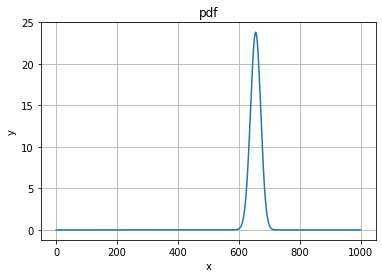

In [163]:
# our events is a list of 0s and 1s, at fixed probabilities
pick_card = np.random.choice(a= ["Player 1", "Dealer"],
                            p = [0.54, 0.46],
                            size=(Player1win+Dealerwin))

#Player 1 wins
successes = len([ x for x in allwinner if x=="Player 1" ]) 
#Dealer win
failures = len(pick_card) - successes

# prior parameters
alpha, beta = 1, 1

# calculate posterior distribution, using a beta distribution
posterior = stats.beta(alpha + successes, beta + failures)

# mean and 95% credible interval
mean = posterior.mean()
interval = posterior.interval(0.95)
print(interval)

#posterior distribution for plotting
plot = np.linspace(0, 1, num=1000)
pdf = posterior.pdf(plot)
plt.plot(pdf)
plt.xlabel('x')
plt.ylabel('y')
plt.title('pdf')
plt.grid(True)
plt.show()

***The probability of Player 1 winning the game is 17.6% using the strategy in Question 2 whereas the probabilty of Player 1 winning is 62% using the strategy table given in Question 3. Therefore, it can be concluded that probablity of player 1 winning is high using the startegy table given in question 3.***

<div style="text-align: right">50 points</div>

# 2. Fair or Crooked?

We have a coin and we don't know if it's fair or not. Let's see if it's **fair**, with a little bit of help from Data Science! We will compute a **p-value**, but using **Bayesian estimation** instead of a t-test! This is a ***real*** test statistic, where we visit parallel universes, but we use real Bayesian simulations instead of assuming that the data is *pretty* or that we have a Student-T distribution.

<br />
<center>
<img src = ipynb.images/coin-toss.jpg width = 300 />
</center>

So we toss the coin a thousand times and record the following tosses: 

In [2]:
import numpy as np

In [164]:
alltosses = '''TTTTHTHHTHHTTHHHHTTHHHTHHTHTTHHHHHTHTTTTHHTTHHTHHTTTHTHHHTHTHHTTTHHHHTHHTTHTHTHHTHHTTHHTHTHTHHHHHHHTT
HTHHTTTTTHHTHTTTTTHHTHHHTTHTHHTHHTTHHTHTHTHTHHHTTTTHTTHTTHTTHHHTHHTHTHTTHHHHHTTHHHHHTHHTHHTTHHTTTTTHTTHHHHHTTTTTTHHH
THTHHTTTTHTHTHHTTHTHHHHHHHTTHTTHTTTHHTTTHHTTHHHHHHTTTHTHHHHTHTHHTTTHHTHHTHTHTHHTHHTTHHHHHTTTTHTTHHTHTHHTHTHTHHHHHHTT
TTTHTTHTTHHHTTHHTHTTHHTHHHTTTTTHHHTHTHTTTHHHHTTTTHTTTHTTTHHTHHHHTHTHHHTHHTHTTHTTTHTHHTTTHHHHHTTHHHTTHHTTTHHTTTTHHHHT
HTTTHHHTTTHTHHTHHTHTHHHTHTHTTTHTHTHTTHTTTHHHTTHTTHHTTHHHTHHHHHTTTTHTTHTHHHHTTHHHTTTHHHHTTHHTTTTTHHTTTHHHTTTTTTHTHHTH
HHHTHHHTHTHTTTTTTTHTTHHTHHHTHHTTTTTTHHTHTHHTTTTHTHTTTTHTHHHTTHHTTTHTHTTTHHTHHHTTTTHHHHHTTTHHHTTTHTHHTTTTHTHHHHHHTHHH
TTHTHHHHHTHTHTTHHTHHTTHTHTHTHHTTHTTHHTHHTTHTTHHHHHHTTTHTTHHHHHTTTHHTHHHTTHTHHTTHHTTTTHTTHTTTHHHTHHTTHTTHHTTTTHHTTTHH
HHHTTTTHHHTHTHHHTTTTTHTHTHTHHTHTTHHHHTTHTTTHTTHHHTHTHTTHHHHTHHTHTHTHHTTTHHHTHTTHHTTHTTHTTTTHHHHHTHHHHTTTHHHHTTHHHHHT
HHTHTTHTTHHHTTHTHTTTTTHTTTTTHHHTTTHTTHTHTHHHTHHTHTTHHHTHTHTTTTTTHTTHHHHTHHHHHHHTHHTTTHH'''

Use this cell to remove carriage returns:

In [165]:
alltosses = alltosses.replace('\n', '')
alltosses 

'TTTTHTHHTHHTTHHHHTTHHHTHHTHTTHHHHHTHTTTTHHTTHHTHHTTTHTHHHTHTHHTTTHHHHTHHTTHTHTHHTHHTTHHTHTHTHHHHHHHTTHTHHTTTTTHHTHTTTTTHHTHHHTTHTHHTHHTTHHTHTHTHTHHHTTTTHTTHTTHTTHHHTHHTHTHTTHHHHHTTHHHHHTHHTHHTTHHTTTTTHTTHHHHHTTTTTTHHHTHTHHTTTTHTHTHHTTHTHHHHHHHTTHTTHTTTHHTTTHHTTHHHHHHTTTHTHHHHTHTHHTTTHHTHHTHTHTHHTHHTTHHHHHTTTTHTTHHTHTHHTHTHTHHHHHHTTTTTHTTHTTHHHTTHHTHTTHHTHHHTTTTTHHHTHTHTTTHHHHTTTTHTTTHTTTHHTHHHHTHTHHHTHHTHTTHTTTHTHHTTTHHHHHTTHHHTTHHTTTHHTTTTHHHHTHTTTHHHTTTHTHHTHHTHTHHHTHTHTTTHTHTHTTHTTTHHHTTHTTHHTTHHHTHHHHHTTTTHTTHTHHHHTTHHHTTTHHHHTTHHTTTTTHHTTTHHHTTTTTTHTHHTHHHHTHHHTHTHTTTTTTTHTTHHTHHHTHHTTTTTTHHTHTHHTTTTHTHTTTTHTHHHTTHHTTTHTHTTTHHTHHHTTTTHHHHHTTTHHHTTTHTHHTTTTHTHHHHHHTHHHTTHTHHHHHTHTHTTHHTHHTTHTHTHTHHTTHTTHHTHHTTHTTHHHHHHTTTHTTHHHHHTTTHHTHHHTTHTHHTTHHTTTTHTTHTTTHHHTHHTTHTTHHTTTTHHTTTHHHHHTTTTHHHTHTHHHTTTTTHTHTHTHHTHTTHHHHTTHTTTHTTHHHTHTHTTHHHHTHHTHTHTHHTTTHHHTHTTHHTTHTTHTTTTHHHHHTHHHHTTTHHHHTTHHHHHTHHTHTTHTTHHHTTHTHTTTTTHTTTTTHHHTTTHTTHTHTHHHTHHTHTTHHHTHTHTTTTTTHTTHHHHTHHHHHHHTHHTTTH

For the remainder of the problem, let's assume that `T` is modelled as a `0`, and `H` as a `1`.

### Question 1

Based on the `alltosses` roll above, what is the frequency for each side of the coin? Write this down in the cell below in the form of a `pandas` Series, then a `pandas` dataframe. 

Call `sides` your pandas series, and `toss_df` your pandas dataframe.

>**HINT**: Use a python `Counter` to get `T` and `H` frequencies.
```(python)
import pandas as pd
from collections import Counter
sides = pd.Series(...
```

In [166]:
import pandas as pd
from collections import Counter

print(Counter(list(alltosses)))
sides = pd.Series(Counter(list(alltosses)))
print(sides)

Counter({'H': 516, 'T': 484})
T    484
H    516
dtype: int64


Now plot the histogram.

(array([484.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 516.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

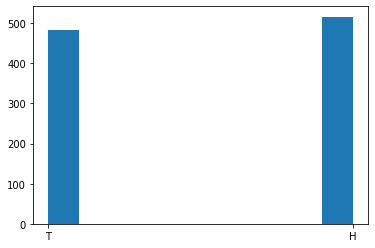

In [168]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist([x for x in alltosses])

In [171]:
toss_df = pd.DataFrame.from_dict(sides)
toss_df


,0
T,484
H,516


What statistical probability density profile might you match this distribution with?

Answer:Bernoulli distribution

Now we ask ourselves: What is the probability of seeing results like this by ***chance***?

### Question 2: Hypothesis testing: Is the apparent effect real, or is it due to chance?  

To answer that question, we formulate two hypotheses: the **null hypothesis H0** is a model of the tosses if the histogram above is due to ***chance***. The **alternate hypothesis HA** is a model of a **crooked** (unfair) coin.

Ideally we should compute the probability of seeing a this empirical histogram effect $E$ under ***both*** hypotheses; that is $P(E \;|\; H0)$ and $P(E \;|\; \text{HA})$.  But formulating $HA$ is not always easy, so in conventional hypothesis testing, we just compute $P(E \;|\; H0)$, which is the **p-value**.  

If the p-value is ***small***, we conclude that our somewhat skewed histogram is unlikely to have occurred by chance, which suggests that the coin is **crooked**.

#### Step 1: Build the null hypothesis
The first step is to get data from our observations and compute a test statistic. The result is some measure of the size of the effect, or **delta**. For example, if we were comparing the mean of two groups, delta is the **difference in the means**. Since we are comparing actual values with expected values, delta is a **chi-squared** statistic: a measure of the distance between the observed and expected values.

#### Step 2: Build a model
The next step is to build a model from our empirical observations and generate simulated data. Then we'll apply the test statistic to the simulated data.

#### Step 3: How many times does the test statistic for the simulated data *exceed the delta*?
The last step is the easiest: Count how many times the test statistic for the simulated data exceeds the delta from the null hypothesis simulation. That's the **p-value**!

To compute a p-value, we have to choose a test statistic that measures how *unexpected* the histogram above is.  The **chi-squared** statistic is a reasonable choice: for each coinc toss we compare the expected frequency and the observed frequency and compute the sum of the squared relative differences.

We have 2 sides to the coin, thus we expect the following frequency for each toss:

In [172]:
len(alltosses)/2

500.0

In [173]:
observed_tosses = [x for x in alltosses]
observed_tosses[:10]

['T', 'T', 'T', 'T', 'H', 'T', 'H', 'H', 'T', 'H']

Use a **list comprehension** to get a list of numbers, either 0 or 1, representing our observations. use 0 for `T` and ` for `H`:

In [174]:

observed_tosses_bin = [0 if x=='T' else 1 for x in alltosses]
observed_tosses_bin[:20]

##Convert T and H to 0's and 1's


[0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1]

Now we define a **Chi squared** statistic to measure the difference between an expected distribution and an observed one:

In [175]:
#Building the Chi sqaured test to find the difference
def ChiSquared(observed, expected):
    total = 0
    for obs in observed:
        total += obs
    return np.abs(total - expected)

ChiSquared(observed_tosses_bin, len(alltosses)/2)

16.0

For the observed frequencies, the chi-squared statistic is 16.  By itself, this number doesn't mean anything.  We have to ***compare it*** to results from the **null hypothesis**.

We may also need a chi statistic to compare draws from the null hypothesis with draws from the alternate hypothesis. Here it is:

In [176]:
def ChiSquared2(observed, expected):
    total = 0
    both = zip(observed, expected)
    for obs, exp in zip(observed, expected):
        total += np.abs(obs - exp)
    return total

Now we need code that generates *simulated* data. Let's do Bayesian estimation to simulate data with the same statistics as our empirical observations, and then also write a null hypothesis (fair data) simulator.

In the pymc3 simulation below, you will pick your data likelihood function from a list of statistical functions (pdfs). Make sure you pick the right one. My symbol for this function is `???`. Pick the right one and import it from `pymc3`.

In Bayesian estimation, we *also* assign pdfs to the parameter(s). Use the [logistic]() function to assign a pdf to the first parameter of your ??? distribution, and a Normal distribution to the parameter itself. That is a very common practice for any binary variable in ML. We will use a large standard deviation (10) because we have no idea what the parametes should be. 

In [13]:
from pymc3 import Model, Normal,Bernoulli
import theano.tensor as T

def logistic(l):
    return 1 / (1 + T.exp(-l))

with Model() as toss_model:
    mu = Normal('mu', mu=0, sd=10)
    
with toss_model:
    toss_like = Bernoulli('toss_like', p=logistic(mu), observed=observed_tosses_bin)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\prana\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


And now we find a solution for `mu` using pymc3. We run for 1,000 timesteps and we hope we converge!

In [14]:
RANDOM_SEED = 42

In [15]:
from pymc3 import fit

with toss_model: 
    toss_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Average Loss = 698.86: 100%|██████████| 10000/10000 [02:18<00:00, 72.18it/s]
Finished [100%]: Average Loss = 698.86


We now plot the posterior distribution for `mu` in order to find its most likely value (the mean of the posterior):

C:\Users\prana\Anaconda3\lib\site-packages\pymc3\plots\__init__.py:21: UserWarning: Keyword argument `varnames` renamed to `var_names`, and will be removed in pymc3 3.8
  warnings.warn('Keyword argument `{old}` renamed to `{new}`, and will be removed in pymc3 3.8'.format(old=old, new=new))


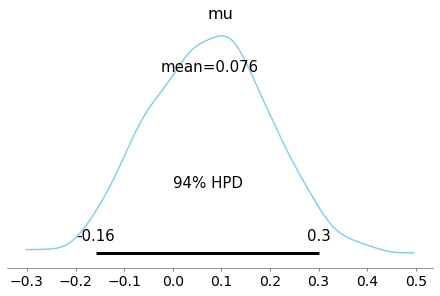

In [16]:
from pymc3 import plot_posterior

plot_posterior(toss_trace[100:], 
                varnames=['mu'],
                color='#87ceeb');

In [17]:
1 / (1 + np.exp(0.076))

0.48100914005407436

Now plot the *simulated* (fake) distribution of coin tosses, based on the statistics of the observed coin tosses. Make sure to import the *same* likelihood pdf you used from pymc3, but this time import it from `scipy.stats.distributions` (note: the captialization of the distribution in scipy may be different):

C:\Users\prana\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\hist.py:412: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)


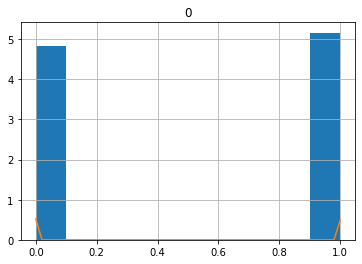

In [18]:
from scipy.stats.distributions import bernoulli
import numpy as np

mu_posterior_mean = 1 / (1 + np.exp(0.076))

pd.DataFrame(observed_tosses_bin).hist(normed=True)
plt.plot(np.linspace(0, 1),  bernoulli.pmf(np.linspace(0, 1), mu_posterior_mean))

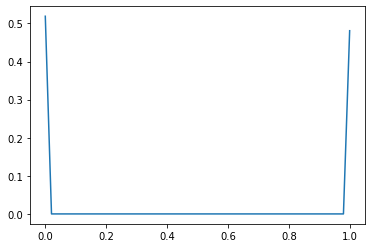

In [19]:
plt.plot(np.linspace(0, 1),  bernoulli.pmf(np.linspace(0, 1), mu_posterior_mean))

Does it match the observed distribution?

If it does, we are now ready to simulate, i.e. generate fake coin tosses. This is called **generating posterior predictive checks**:

Posterior predictive checks (PPCs) *validate* your model: You generate data from the model using parameters from draws from the posterior. The `samples` parameter is how many of these simulations you want to run.

Here is one way of doing it (deprecated):

In [20]:
from pymc3 import sample_ppc

with toss_model:
    toss_ppc = sample_ppc(toss_trace, samples=1)

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  after removing the cwd from sys.path.
C:\Users\prana\Anaconda3\lib\site-packages\pymc3\sampling.py:1247: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  "samples parameter is smaller than nchains times ndraws, some draws "
100%|██████████| 1/1 [00:00<00:00, 44.38it/s]


Here is another way (the preferred one):

In [21]:
from pymc3 import sample_posterior_predictive
ppc = sample_posterior_predictive(toss_trace, samples=1, model=toss_model)

100%|██████████| 1/1 [00:00<00:00, 334.05it/s]


In [22]:
toss_ppc['toss_like'].shape

(1, 1000)

In [23]:
simulated_tosses = toss_ppc['toss_like'][0]
simulated_tosses[:20]

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [24]:
faketosses = ''.join([str(int(x)) for x in simulated_tosses])
faketosses

'111101001100111011101000000101010100000001110011110111101101101101101001100110010100001010100001001011010110010110111111110001001111011100101110011111111011110110011101101001110111000111001000011101100100110010111101011110010111111100100011010100000010100101101000100101111111001101011011011101111001100010001011001000100000110000111110111011111000110111111111001111101010101100110101111100100000011101101000111010010111111100110010110010010010011001111101011100110111111010100011101101111111110100011111101100110111110111110001111110011011000000111100100111001111010100011111101110011111111100100111100111100110101110111010110010111011110110010110111001110011100101010000110100111101000011001101001101011011100101111010111111101011110101111111101101000110010101011110101011110000011010100100011100101101111100101000010011010011011100001111001110110000111101010101100110100110100000010110000001101101100101110111111101110101011011011011001101001110111111001011001101010101011001011111111111011000000

In [25]:
len(faketosses)

1000

Now we can simulate our coin (i,e. simulate similar statistics to our heart's content):

In [26]:
def SimulateAlternateHypothesisCoin():
    with toss_model:
        toss_ppc = sample_ppc(toss_trace, samples=1)
    simulated_tosses = toss_ppc['toss_like'][0]
    return ''.join([str(int(x)) for x in simulated_tosses])

And... find a way to simulate a **fair** coin so you get results in the same shape here below:

In [27]:
from random import randrange

def SimulateNullHypothesisCoin(length):
    tosses = ''
    for i in range(length):
         tosses = tosses + str(randrange(0,2,1))
    return tosses


How many `H`s do we get from the alternate hypothesis simulation, and from the null hypothesis simulation?

In [28]:
Counter(SimulateAlternateHypothesisCoin())['1']

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 1/1 [00:00<?, ?it/s]


579

In [29]:
Counter(SimulateNullHypothesisCoin(1000))['1']

494

Now, we know that the expected frequency for each toss for a fair coin is 1000/2 = 500. This is how we can compare observation to null hypothesis. Although we may want to conclude that the p-value is low with the test below, ***there is still a possibility we got this result by chance***:

In [30]:
expected = 1000/2
threshold = ChiSquared(observed_tosses_bin, expected)
threshold

16.0

This is for a null hypothesis simulation:

In [31]:
expected = 1000/2
null_hypothesis_sim = SimulateNullHypothesisCoin(1000)
null_hypothesis_sim_bin = [int(x) for x in null_hypothesis_sim]
chi2 = ChiSquared(null_hypothesis_sim_bin, expected)
chi2

6.0

Let's get a p-value where we compare null hypothesis simulations to our empirical data:

In [32]:
count = 0.
roll_size = 1000
num_trials = 1000
expected = 1000/2.

# observed statistic:
threshold = ChiSquared(observed_tosses_bin, expected)
print(threshold)

for _ in range(num_trials):
    null_hypothesis_sim = SimulateNullHypothesisCoin(roll_size)
    null_hypothesis_sim_bin = [int(x) for x in null_hypothesis_sim]
    chi2 = ChiSquared(null_hypothesis_sim_bin, expected)
    if chi2 >= threshold:
        count += 1

pvalue = count / num_trials
print ('p-value', pvalue)

16.0
p-value 0.318


***As p-value is 0.318, null hypothesis is rejected***

If the the p-value is high, higher than the usual 95% Confidence interval, you cannot reject the null hypothesis!

But our empirical experiment (real observations) threshold could very well have been generated ***by chance***!

Here is a much more powerful and conclusive estimation of our **p-value**: We run a lot of null experiments ***and*** a lot of alternative hypothesis experiments, using our Bayesian model (instead of a single observation as above)! And we can ***count*** all times that our null experiment deviates from the expected threshold (*that is the null chi statistic*), and the times that our alternate hypothesis experiment deviates from the expected threshold (*that is the alternate hypothesis chi statistic*), and we can compare the two chi statistics! 

That tells us in how many universes we observe distributions *different* from the null hypothesis, and allows us to generate a *real* probability that our alternate hypothesis simulations (matching our empirical data) **statistically differ** from null hypothesis simulations!

If the p-value is ***small***, you may conclude that the effect is ***unlikely to have occurred by chance***, which suggests that it is ***real***: The coin is crooked. If the p-value is ***high***, you cannot dismiss the null hypothesis and you need to conclude that the coin is fair and any skew in the statistics is due to *chance*.

In [33]:
count = 0.
roll_size = 1000
num_trials = 1000
expected = 1000 / 2.

for _ in range(num_trials):
    null_hypothesis_sim = SimulateNullHypothesisCoin(roll_size)
    null_hypothesis_sim_bin = [int(x) for x in null_hypothesis_sim]
    chi_null = ChiSquared(null_hypothesis_sim_bin, expected)
    
    alternate_hypothesis_sim = SimulateAlternateHypothesisCoin()
    alternate_hypothesis_sim_bin = [int(x) for x in alternate_hypothesis_sim]
    chi_alternate = ChiSquared(alternate_hypothesis_sim_bin, expected)

    if chi_null >= chi_alternate:
        count += 1

pvalue = count / num_trials
print ('p-value', pvalue)

C:\Users\prana\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: sample_ppc() is deprecated.  Please use sample_posterior_predictive()
  This is separate from the ipykernel package so we can avoid doing imports until
100%|██████████| 1/1 [00:00<00:00, 1001.27it/s]


100%|██████████| 1/1 [00:00<00:00, 976.33it/s]


100%|██████████| 1/1 [00:00<00:00, 1002.46it/s]


100%|██████████| 1/1 [00:00<00:00, 1002.94it/s]


100%|██████████| 1/1 [00:00<00:00, 1002.46it/s]


100%|██████████| 1/1 [00:00<00:00, 999.12it/s]


p-value 0.021


***As p-value os 0.021, null hypothesis is rejected***

If your p-value is low, there is a *very small* possibility these skewed results are due to chance, so our coin is ***crooked***. If it's high, you cannot conclude and need to accept the null hypothesis.

So, which is it?

That's **hypothesis testing** in a nutshell. All of the classical frequentist tests you learn in classical (non-pythonized and MCMC-ized) statistics class are just ways to compute p-values *efficiently* when computation was expensive. Now that computation is fast and clever algorithms like Metropolis and NUTS are available, Bayesian estimation is the *preferred* way to do statistics, even to compute something like a p-value!